# ```Surprise Housing``` - Price Prediction Model

## Problem Statement
A US-based housing company named ```Surprise Housing``` has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

### The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.
    

- Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## The solution is divided into the following sections: 

1. Data understanding and exploration
2. Data cleaning
3. Data preparation
4. Model building & Model evaluation

# 1: Data understanding and exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# import the required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV



In [2]:
# hide the warnings

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
houses_ds = pd.read_csv('train.csv')
houses_ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# Shape of the dataset

print(houses_ds.shape)

(1460, 81)


## Dataset contains:
- Rows: `1460`
- Columns: `81`

In [5]:
# Summary of the dataset

print(houses_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Description of the dataset

houses_ds.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Describe method:

- Using describe, we'll get some insight about the data, as it provide the all the high level Statistics information of the data like - 25%, 50%, 75%, min , max, std, count, mean


# Understanding the - Data Dictionary

- The data dictionary contains the meaning of various attributes, which will help in understanding the data in details.

- For small data we can look one by one but as we have large number of columns so have a look some of the variables at least.

In [7]:
# MSSubClass: Identifies the type of dwelling involved in the sale.

# 20 1-STORY 1946 & NEWER ALL STYLES
# 30 1-STORY 1945 & OLDER
# 40 1-STORY W/FINISHED ATTIC ALL AGES
# 45 1-1/2 STORY - UNFINISHED ALL AGES
# 50 1-1/2 STORY FINISHED ALL AGES
# 60 2-STORY 1946 & NEWER
# 70 2-STORY 1945 & OLDER
# 75 2-1/2 STORY ALL AGES
# 80 SPLIT OR MULTI-LEVEL
# 85 SPLIT FOYER
# 90 DUPLEX - ALL STYLES AND AGES
# 120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
# 150 1-1/2 STORY PUD - ALL AGES
# 160 2-STORY PUD - 1946 & NEWER
# 180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
# 190 2 FAMILY CONVERSION - ALL STYLES AND AGES

houses_ds['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

- **MSSubClass:** - Identifies the type of dwelling involved in the sale.
    - As 'MSSubClass' int datatype but after looking into the data-dictionary it's belong the the categorical variable
    - Most of the houses are in - 20, 60, 50


In [8]:
# MSZoning: Identifies the general zoning classification of the sale.

# A   Agriculture
# C   Commercial
# FV  Floating Village Residential
# I   Industrial
# RH  Residential High Density
# RL  Residential Low Density
# RP  Residential Low Density Park 
# RM  Residential Medium Density

houses_ds['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

- **MSZoning:** - Identifies the general zoning classification of the sale.
    - Most of the houses are - RL, RM and FV

In [9]:
# Street: Type of road access to property
# Grvl Gravel
# Pave Paved

houses_ds['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

- **Street:** - Type of road access to property
    - Most of the houses are - Pave


In [10]:
# Alley: Type of alley access to property
# Grvl  Gravel
# Pave  Paved
# NA    No alley access

houses_ds['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

- **Alley:** - Type of alley access to property
    - Most of the houses are - Grvl & Pave
    - Only 90 rows have Alley type and rest are nan
    - Need to handle in missing value section.
    

In [11]:
# Utilities: Type of utilities available

# AllPub  All public Utilities (E,G,W,& S)
# NoSewr  Electricity, Gas, and Water (Septic Tank)
# NoSeWa  Electricity and Gas Only
# ELO     Electricity only

houses_ds['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

- **Utilities:** Type of utilities available
    - Almost houses are - AllPub
    - So, we can drop this variable - ❌

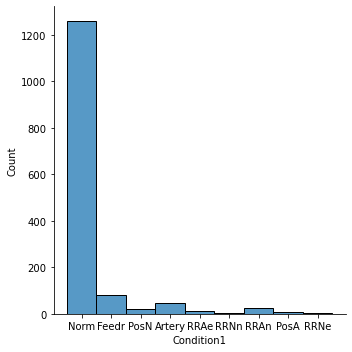

In [12]:
# Condition1: Proximity to various conditions

# Artery  Adjacent to arterial street
# Feedr   Adjacent to feeder street	
# Norm    Normal
# RRNn    Within 200' of North-South Railroad
# RRAn    Adjacent to North-South Railroad
# PosN    Near positive off-site feature--park, greenbelt, etc.
# PosA    Adjacent to postive off-site feature
# RRNe    Within 200' of East-West Railroad
# RRAe    Adjacent to East-West Railroad

sns.displot(houses_ds['Condition1'])
plt.show()

In [13]:
houses_ds['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

- **Condition1:** Proximity to various conditions
    - Most of the houses are - Norm


### As we have large numbers of columns so we can check them in different ways as follows:

## Data Exploration

To perform linear regression, the target variable(numeric) should be linearly related to at least one another numeric variable. Let's see whether that's true in this case:


In [14]:
# numerical and categorical variables.

houses_numerical = houses_ds.dtypes[houses_ds.dtypes != 'object'].index
houses_categorical = houses_ds.dtypes[houses_ds.dtypes == 'object'].index

print("Total number of numerical variables: ", len(houses_numerical))
print("Total number of categorical variables: ", len(houses_categorical))


Total number of numerical variables:  38
Total number of categorical variables:  43


## We have divided given dataset into to category:

- Numerical variables
- categorical variables

In [15]:
houses_ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## Numerical variables:

- Discrete Variables
- Continous variable 

### Discrete Variables

In [16]:
# discreate_features

discreate_features = [feature for feature in houses_numerical if len(houses_ds[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discreate_features)))


Discrete Variables Count: 18


In [17]:
discreate_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

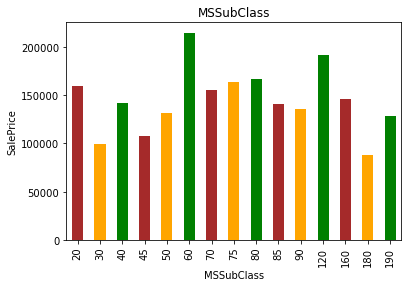

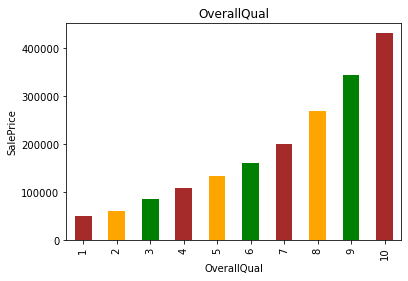

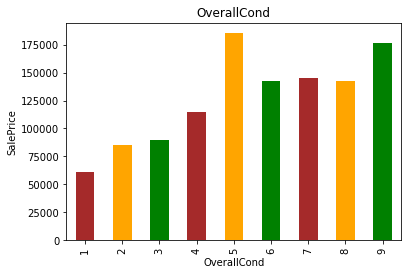

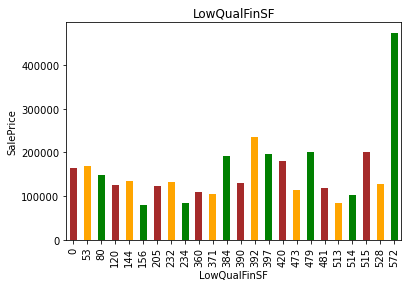

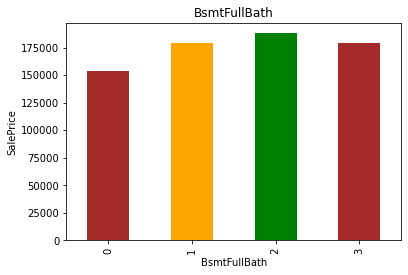

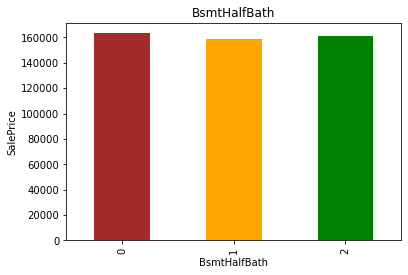

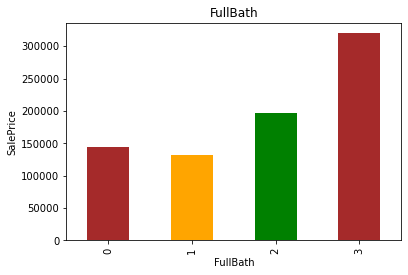

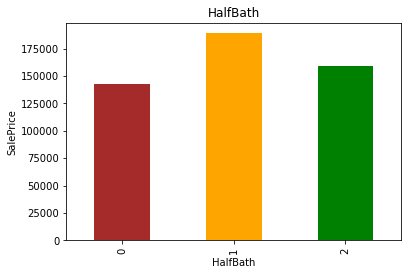

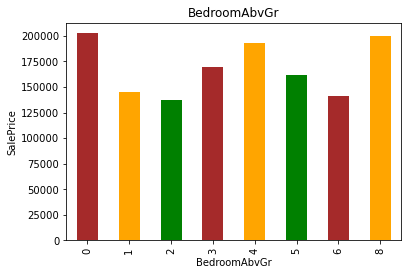

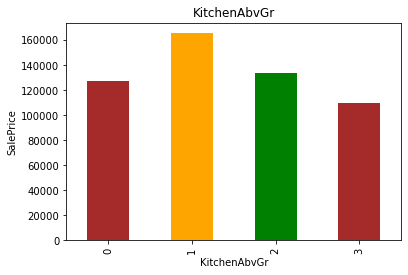

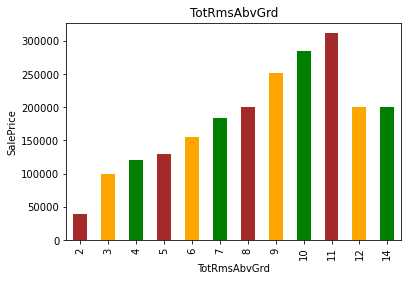

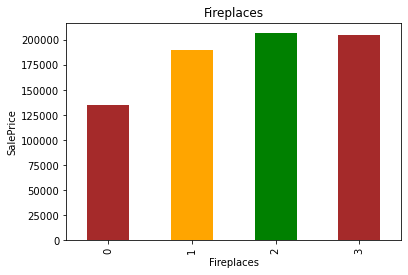

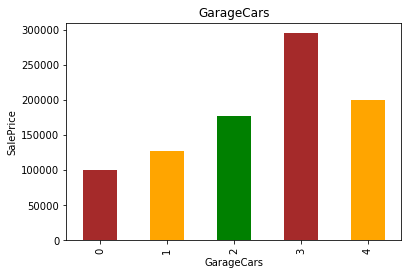

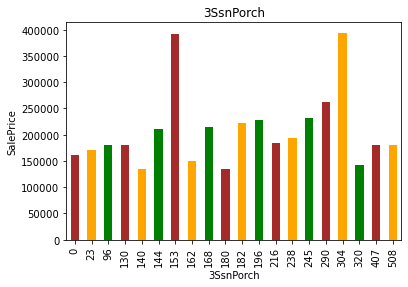

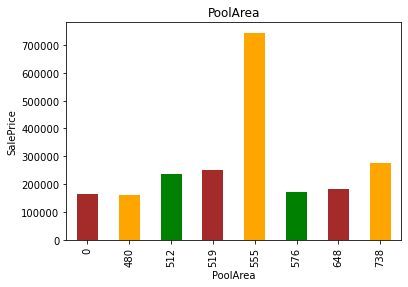

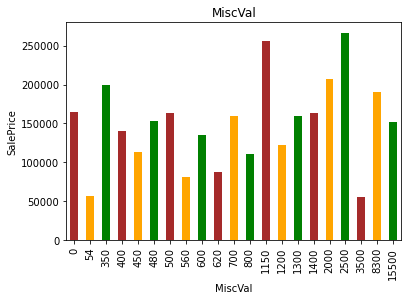

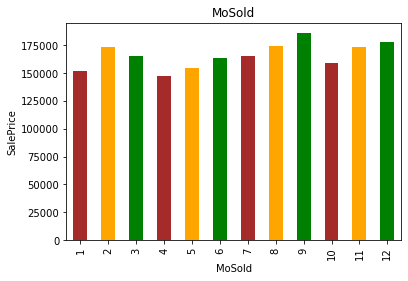

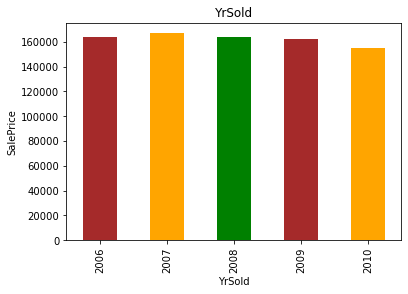

In [18]:
## Lets find the realtionship between 'Discrete Variables' with `SalePRice`

for feature in discreate_features:
    data=houses_ds[:]
#     c = ['orange', 'green', 'blue']
    c = ['brown', 'orange', 'green']
    data.groupby(feature)['SalePrice'].median().plot.bar(color = c)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    

## Insight from the above graph:
- There is a relationship between variable number and SalePrice
- For `OverallQual` variable category increase, `SalePrice` also increase.
- With `TotRmsAbvGrd` variable it’s increase in start but at the end it slightly decease so need to analyse this variable too.


### Continuous Variable


In [19]:
continuous_feature = [feature for feature in houses_ds[houses_numerical] if feature not in discreate_features + ['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))


Continuous feature Count 19


In [20]:
continuous_feature

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

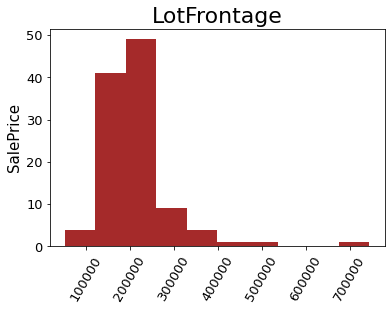

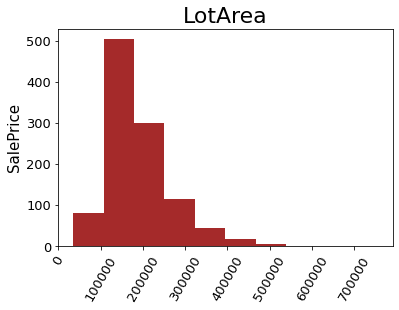

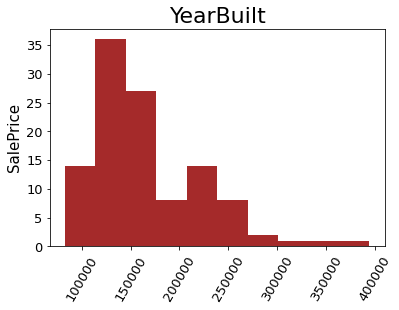

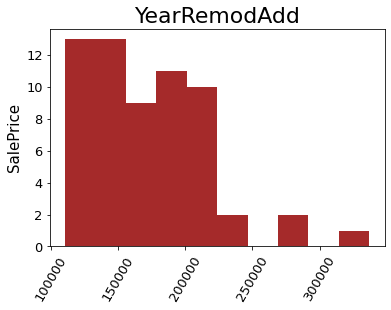

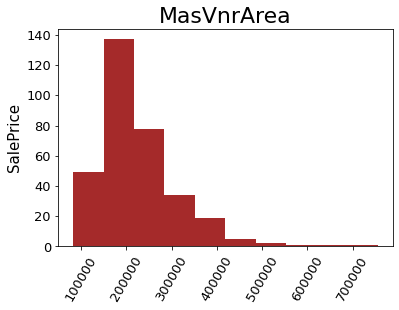

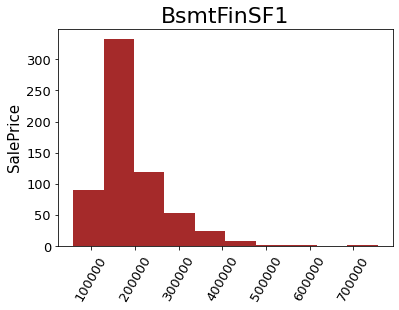

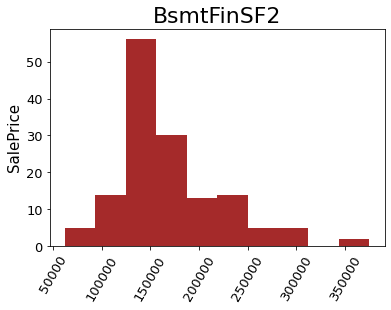

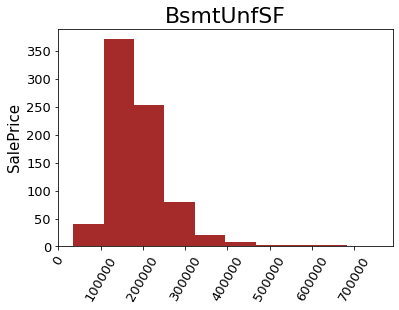

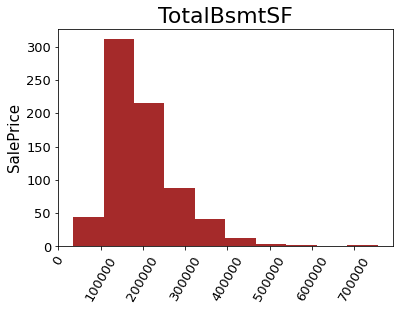

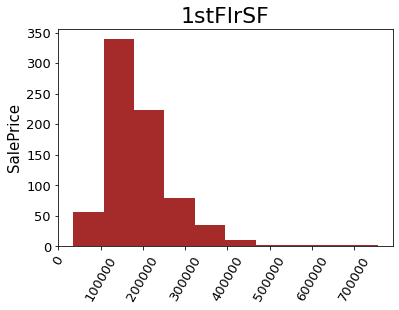

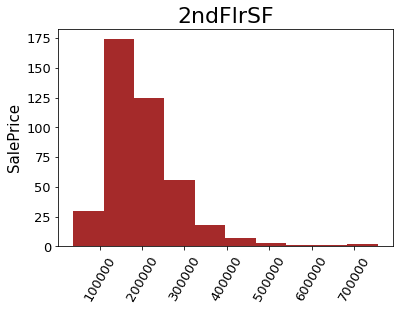

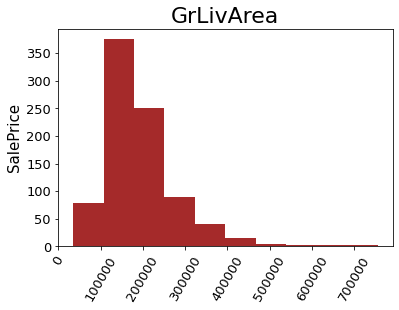

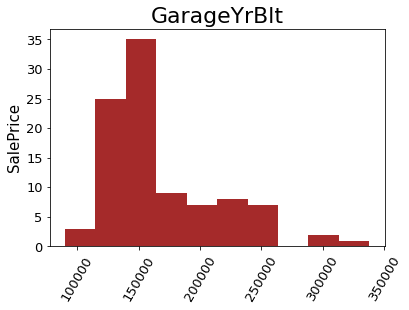

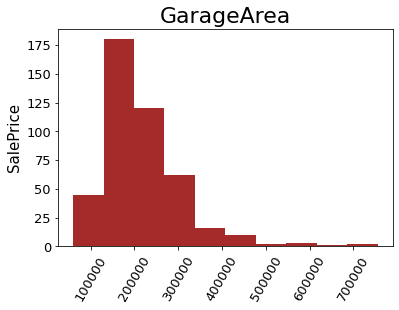

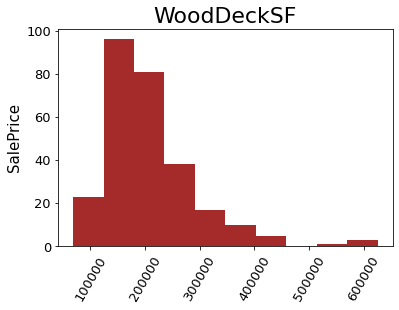

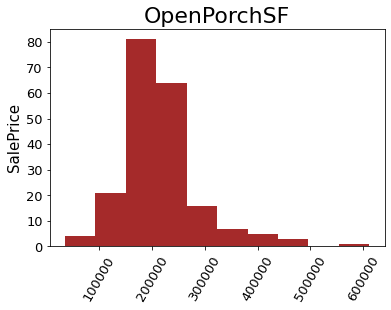

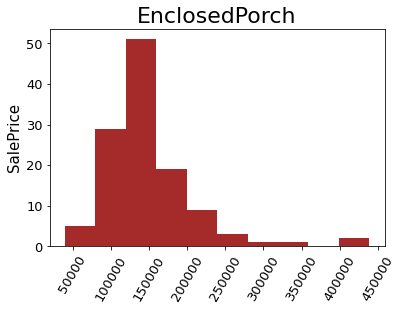

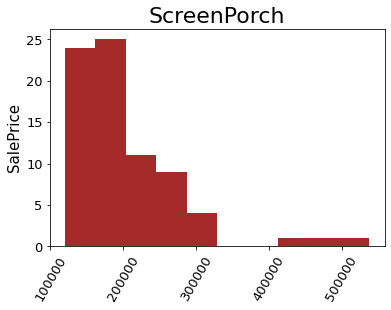

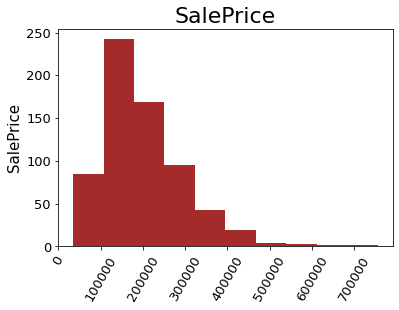

In [21]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    
    data = houses_ds.copy()

    df = data.groupby(feature)['SalePrice'].mean()
    c = ['brown', 'orange', 'green']
    ax = df.plot(kind='hist', fontsize=13, color= c)
    ax.set_alpha(0.8)
    ax.set_title(feature, fontsize=22)
    ax.set_ylabel('SalePrice', fontsize=15);
    plt.xticks(rotation = 60)
    plt.show()

## Continuous Variable
- Most of the variable are right skewed - The mean is greater than the median.

## Pick any one varaible and compare them using  logarithmic transformation

### Normal distribution

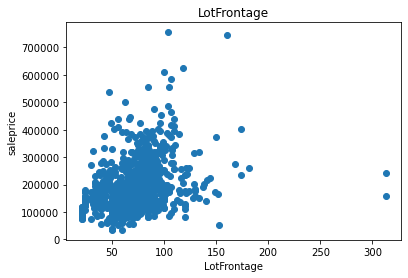

In [22]:
# data['SalePrice'] =  np.log(data['SalePrice'])
plt.scatter(data['LotFrontage'],data['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('saleprice')
plt.title('LotFrontage')
plt.show()

### Logarithmic transformation

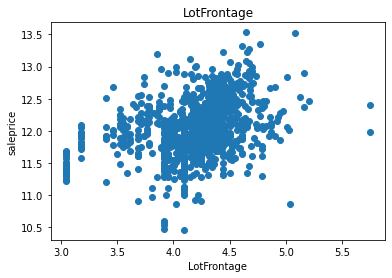

In [23]:
data['LotFrontage']= np.log(data['LotFrontage'])
data['SalePrice'] =  np.log(data['SalePrice'])
plt.scatter(data['LotFrontage'],data['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('saleprice')
plt.title('LotFrontage')
plt.show()

### Here you can see the difference between normal scatter v/s log  transformation make an impact.
- So we need to take care of dependent and non-dependent variable

## Check duplicate values:

In [24]:
# check duplicate entries

temp_col = 0
num_duplicate_val = []
for var in houses_numerical:
    if var == 'Id':
        continue
    else:
        temp_ds = pd.DataFrame(houses_ds[var].value_counts())
        temp_ds["%"] = ((temp_ds[var] / len(houses_ds)) * 100).apply(np.ceil)
        if (temp_ds["%"] >= 95.0).any():
            temp_col += 1
            num_duplicate_val.append(var)
print("Total column: ", len(houses_numerical))
print("Numeric duplicate value more than 95%:", temp_col)
print(num_duplicate_val)




Total column:  38
Numeric duplicate value more than 95%: 6
['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


In [25]:
temp_col = 0
cat_duplicate_val = []
for var in houses_categorical:
    if var == 'Id':
        continue
    else:
        temp_ds = pd.DataFrame(houses_ds[var].value_counts())
        temp_ds["%"] = ((temp_ds[var] / len(houses_ds)) * 100).apply(np.ceil)
        if (temp_ds["%"] >= 95.0).any():
            temp_col += 1
            cat_duplicate_val.append(var)

print("Total column: ", len(houses_categorical))
print("Categorical duplicate value more than 95%::", temp_col)
print(cat_duplicate_val)

Total column:  43
Categorical duplicate value more than 95%:: 6
['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating']


- As we have many columns with duplicate values, so ideally we can drop them who's count is more then 90 or 95 %
- We can take care these variable in data cleaning section

## Missing values:

In [26]:
null_val = (houses_ds.isnull().sum()/len(houses_ds))*100

null_var = pd.DataFrame( {'var_name' : houses_ds.columns,
                         'null_values' : houses_ds.isnull().sum(),
                        'Percentage_null_values': null_val})

null_var = null_var[null_var['null_values'] > 0]

# sorting values on the basis of null values present i dataset
null_var.sort_values(by = 'null_values', ascending = False)

var_name  null_values  Percentage_null_values
PoolQC              PoolQC         1453               99.520548
MiscFeature    MiscFeature         1406               96.301370
Alley                Alley         1369               93.767123
Fence                Fence         1179               80.753425
FireplaceQu    FireplaceQu          690               47.260274
LotFrontage    LotFrontage          259               17.739726
GarageType      GarageType           81                5.547945
GarageYrBlt    GarageYrBlt           81                5.547945
GarageFinish  GarageFinish           81                5.547945
GarageQual      GarageQual           81                5.547945
GarageCond      GarageCond           81                5.547945
BsmtExposure  BsmtExposure           38                2.602740
BsmtFinType2  BsmtFinType2           38                2.602740
BsmtFinType1  BsmtFinType1           37                2.534247
BsmtCond          BsmtCond           37                2.534247
BsmtQual          BsmtQual           37                2.534247
MasVnrArea      MasVnrArea            8                0.547945
MasVnrType      MasVnrType            8                0.547945
Electrical      Electrical            1                0.068493

### Plotting a bar graph for missing values

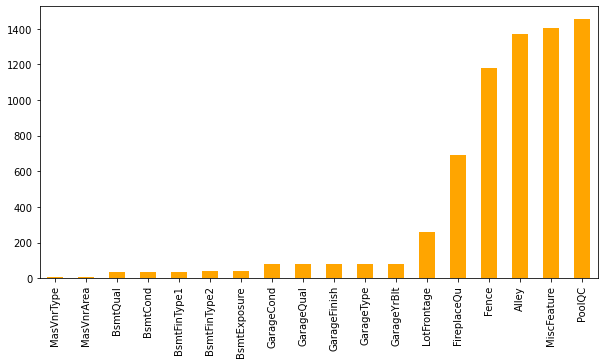

In [27]:
nan_val = houses_ds.isnull().sum()
nan_val = nan_val[nan_val>1]
nan_val.sort_values(inplace=True)
plt.figure(figsize=(10,5))
nan_val.plot.bar(color = 'orange')
plt.show()

### Check the outlier values

#### Checking for outlier in the numerical columns

  - Most of the coloumns having outliers which need to be addressed.

In [28]:
# Check the outlier in the numerical columns

houses_ds.describe(percentiles= [.25, .5, .75, .90, .95, .99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

### Outlier

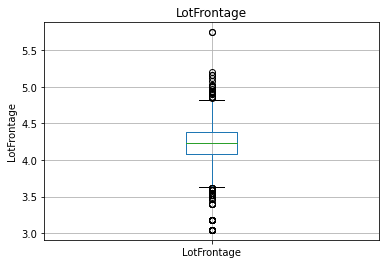

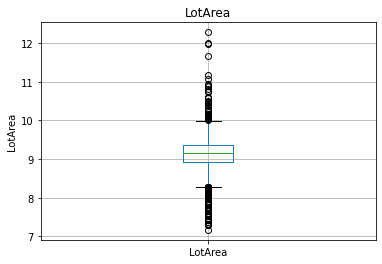

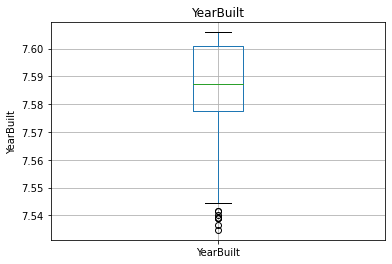

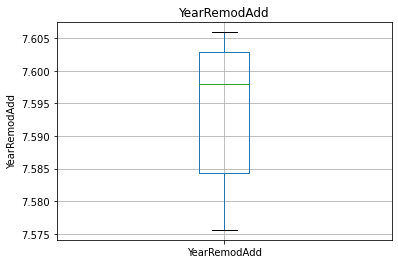

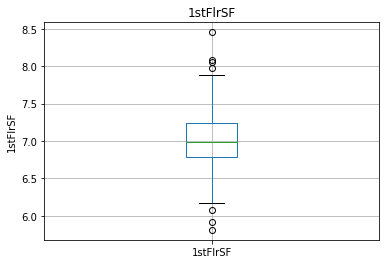

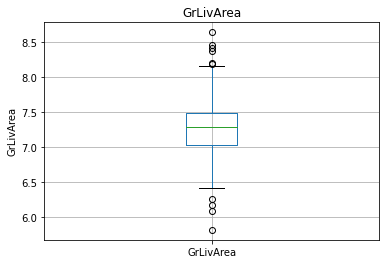

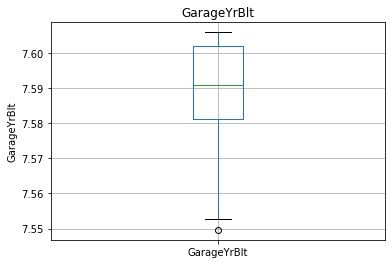

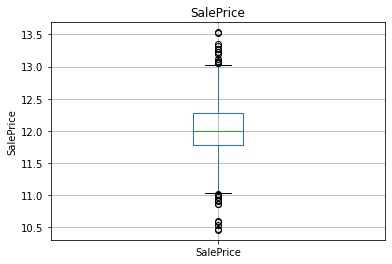

In [29]:
 for feature in continuous_feature:   # only for continuous variables 
    
    data = houses_ds.copy()
    if 0 in data[feature].unique():
        pass 
    else:
        data[feature]= np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

## Categorical variables:

In [30]:
houses_ds[houses_categorical].shape

(1460, 43)

In [31]:
# Top 5 records of categorical datatype

houses_ds[houses_categorical].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [32]:
for feature in houses_categorical:
    print('The feature is {} and number of categories are {}'.format(feature,len(houses_ds[feature].unique())))


The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

- Find out the relationship between categorical variable and dependent feature SalesPrice


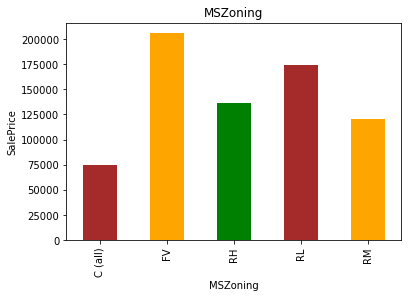

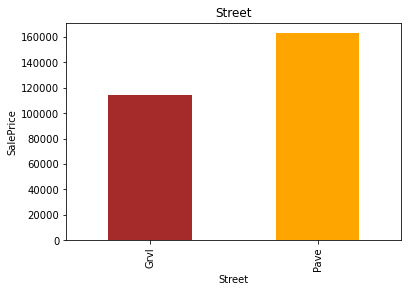

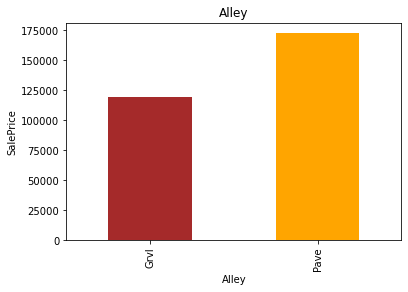

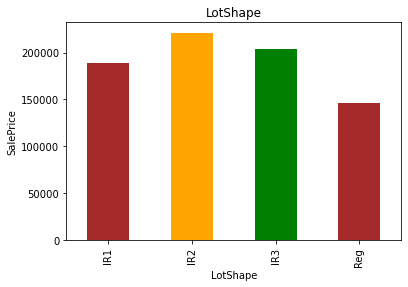

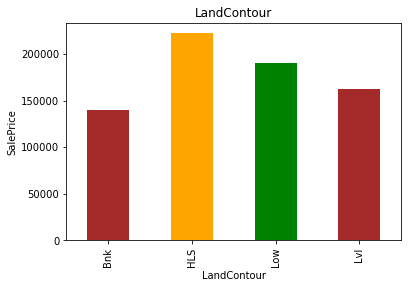

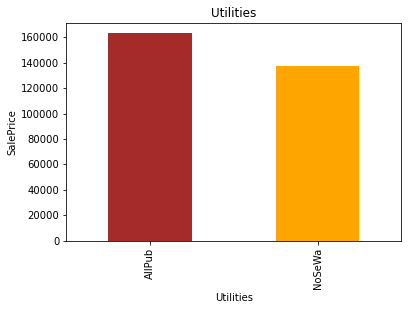

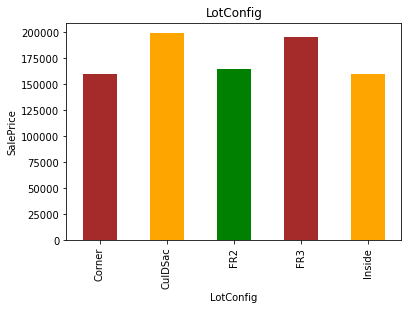

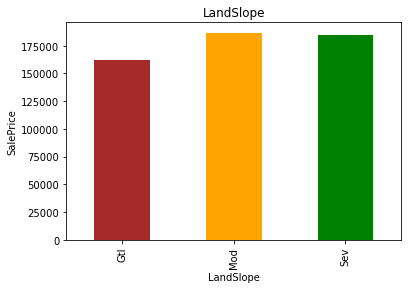

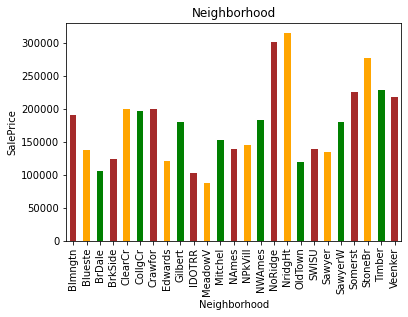

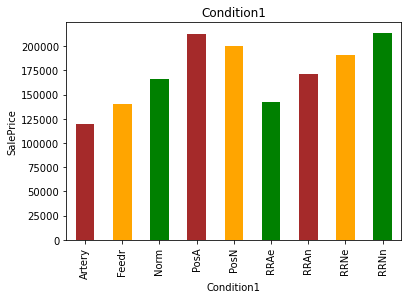

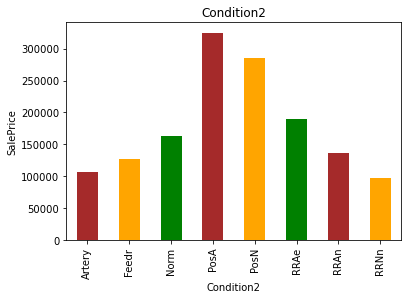

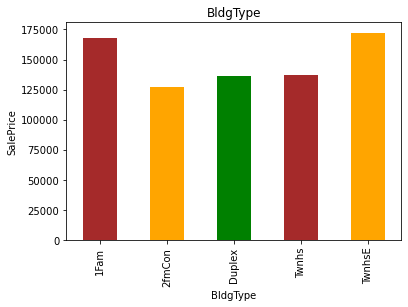

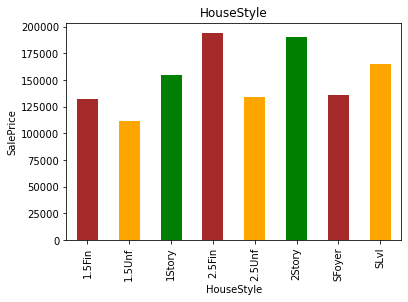

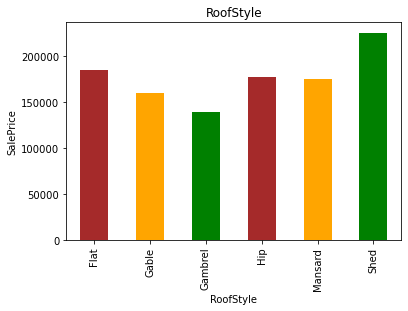

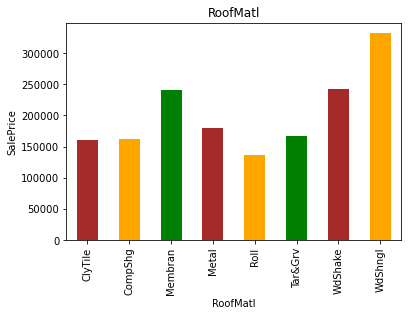

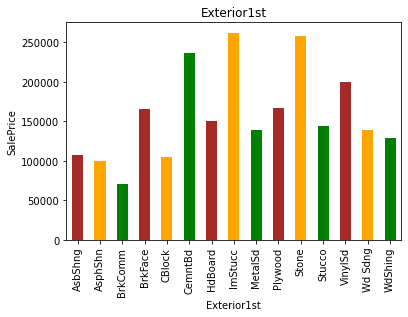

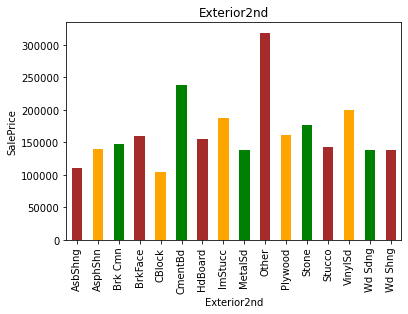

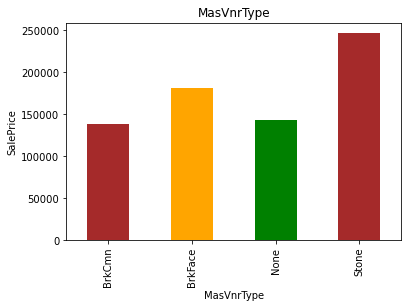

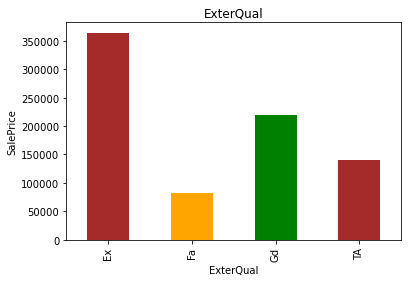

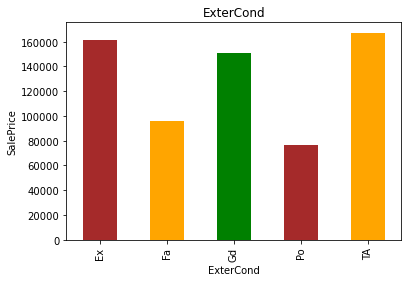

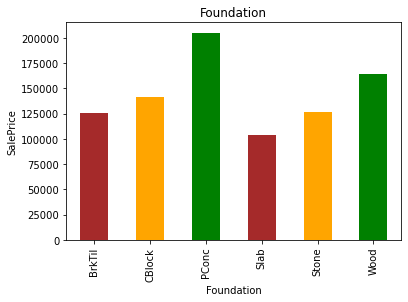

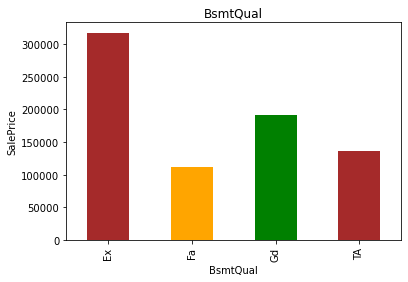

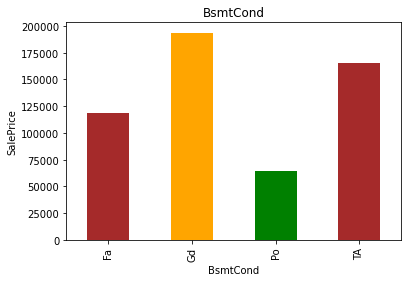

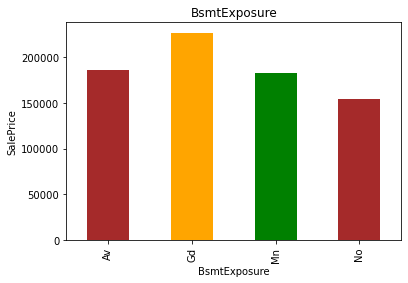

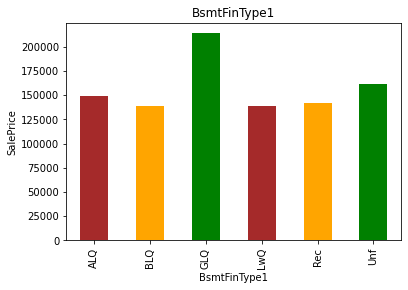

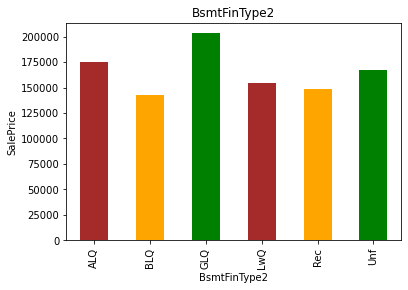

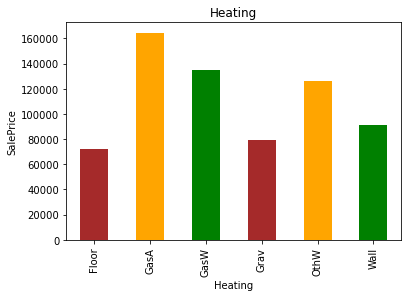

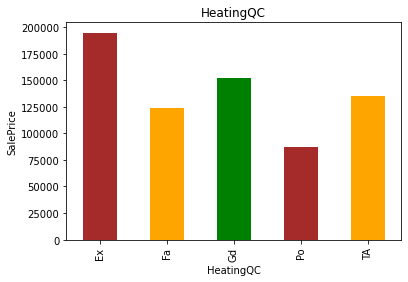

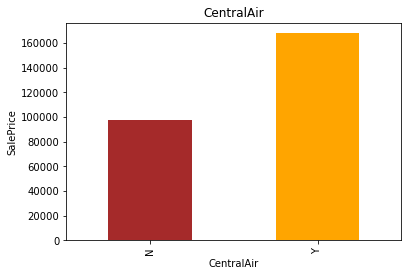

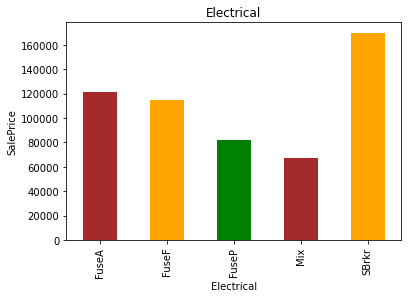

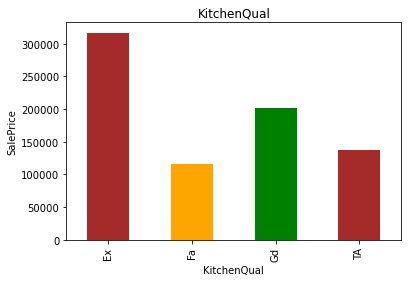

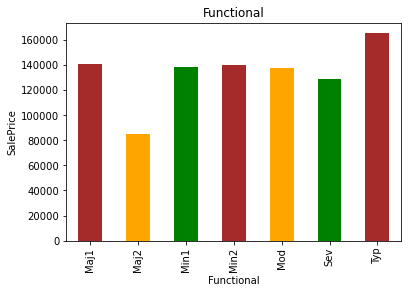

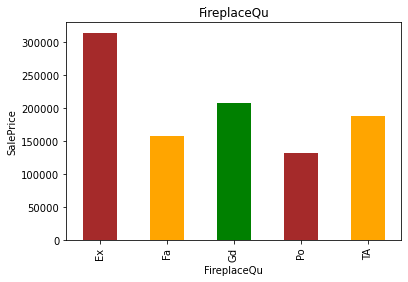

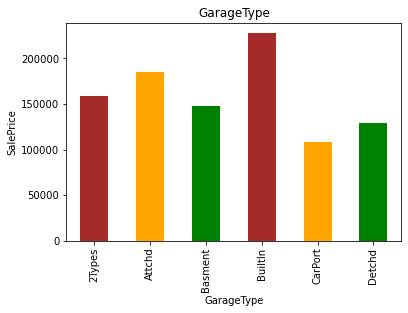

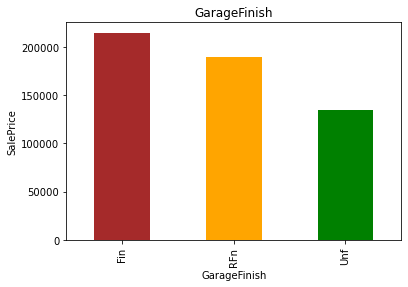

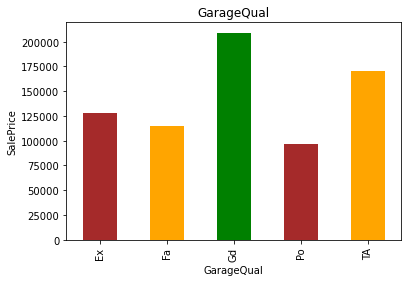

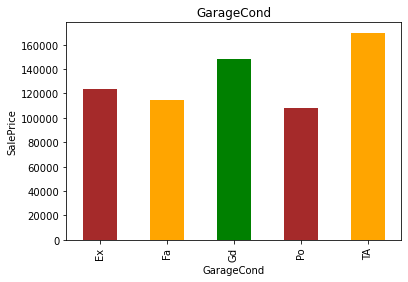

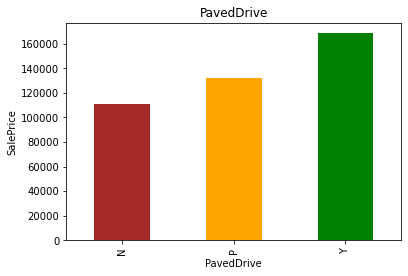

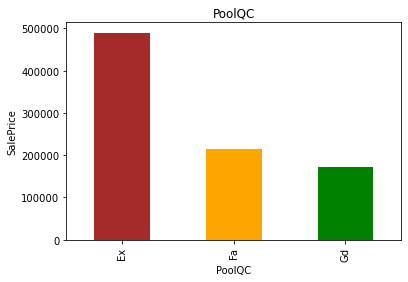

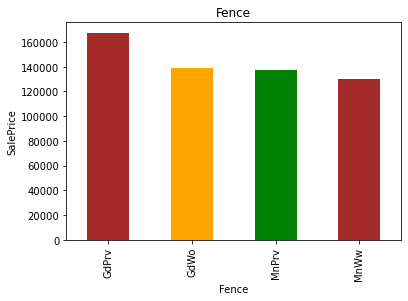

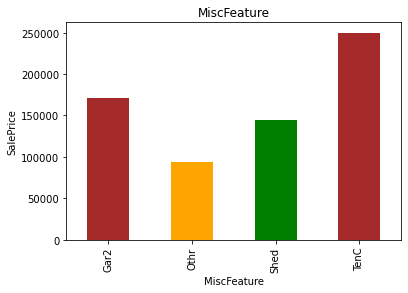

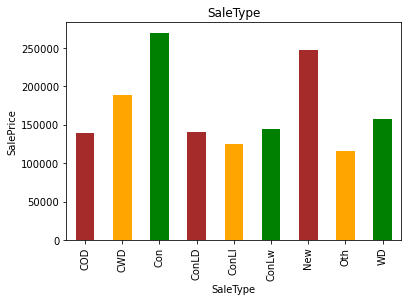

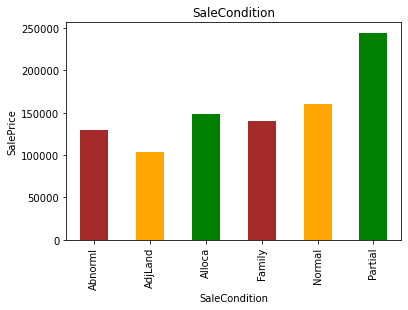

In [33]:
for feature in houses_categorical:
    data=houses_ds.copy()
    c = ['brown', 'orange', 'green']
    data.groupby(feature)['SalePrice'].median().plot.bar(color = c)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# 2. Data cleaning

Let's now conduct some data cleaning steps. 

- As we've seen that there are lot's of missing values in the dataset. So either need to impute those values or drop those.
- Will create dummy variable for the categorical variables.
- Need to take care of the outlier's.

In [34]:
houses_ds.shape

(1460, 81)

### Droping columns with NaN values more than 80%

In [35]:
print('Features having NaN values more than 80%')
print('*'*50)
for feature in houses_ds.columns:
    if ((houses_ds[feature].isnull().sum()/houses_ds.shape[0])*100) >= 80:
        print(feature)
        houses_ds.drop(feature, axis = 1, inplace= True)
print('*'*50)

Features having NaN values more than 80%
**************************************************
Alley
PoolQC
Fence
MiscFeature
**************************************************


### Now there are NaN values for Object datatype, so we need to replace these NaN values with 'Missing'


In [36]:
def replace_cat_feature(houses_ds):
    for feature in houses_ds.columns:
        if (houses_ds[feature].isnull().sum() > 0) and (houses_ds[feature].dtypes == 'O'):
            houses_ds[feature].fillna('missing')
    return houses_ds

houses_ds=replace_cat_feature(houses_ds)
houses_ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

### Now lets check for numerical features contains missing values
  - We will print the numerical features with percentage of missing values

In [37]:
features_nan = [feature for feature in houses_ds.columns if houses_ds[feature].isnull().sum()>0
                and houses_ds[feature].dtypes !='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(houses_ds[feature].isnull().mean(),4)))
    
    

LotFrontage: 0.1774% missing values
MasVnrArea: 0.0055% missing values
GarageYrBlt: 0.0555% missing values


### Lets check these three features one by one using describe() method :

### As we can see for :
  - **LotFrontage** and **MasVnrArea** have outliers so better to replace NaN with median().
  - **GarageYrBlt** also we can replace with median()

In [38]:
# Will check these columns one by one
houses_ds['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [39]:
houses_ds['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [40]:
houses_ds['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

### To crosscheck after imputing numeric nan values

In [41]:
# Imputing the numeric variables

houses_ds["LotFrontage"].fillna(houses_ds["LotFrontage"].median(), inplace=True)
houses_ds["GarageYrBlt"].fillna(houses_ds["GarageYrBlt"].median(), inplace=True)
houses_ds["MasVnrArea"].fillna(houses_ds["MasVnrArea"].median(), inplace=True)


In [42]:
houses_ds[features_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

## Find out relationship between Some of the Categorical Features with Dependent Feature SalePrice

- Target variable 'sale Price' vs a few select columns


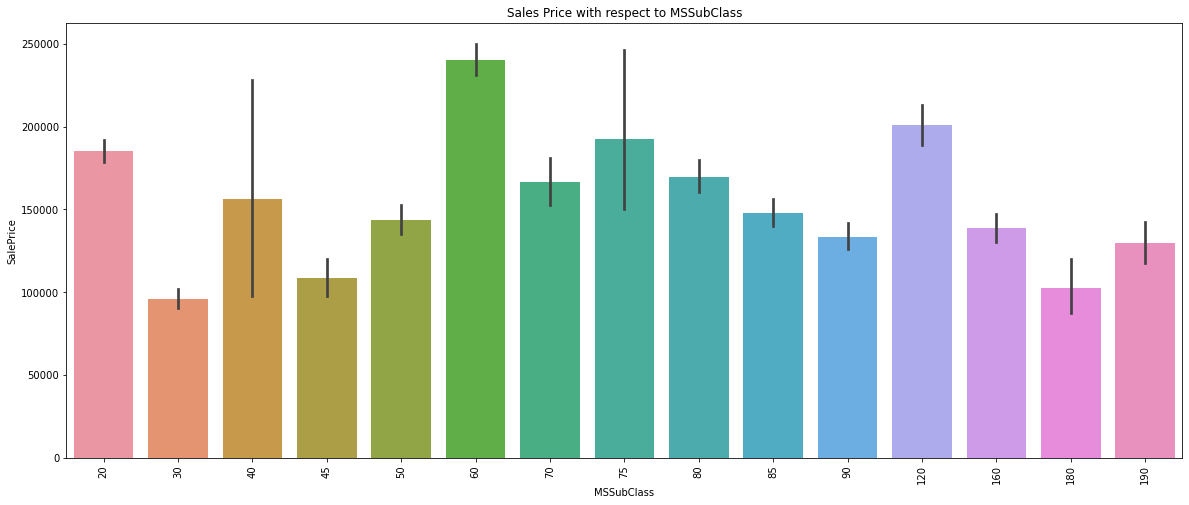

In [43]:
# plot 'Sale Price' with respect to 'MSSubClass'

plt.figure(figsize=(20, 8))
sns.barplot(x="MSSubClass", y="SalePrice", data= houses_ds)
plt.title("Sales Price with respect to MSSubClass")
plt.xticks(rotation=90)
plt.show()

- Properties in some of the Neighborhoods are high priced.


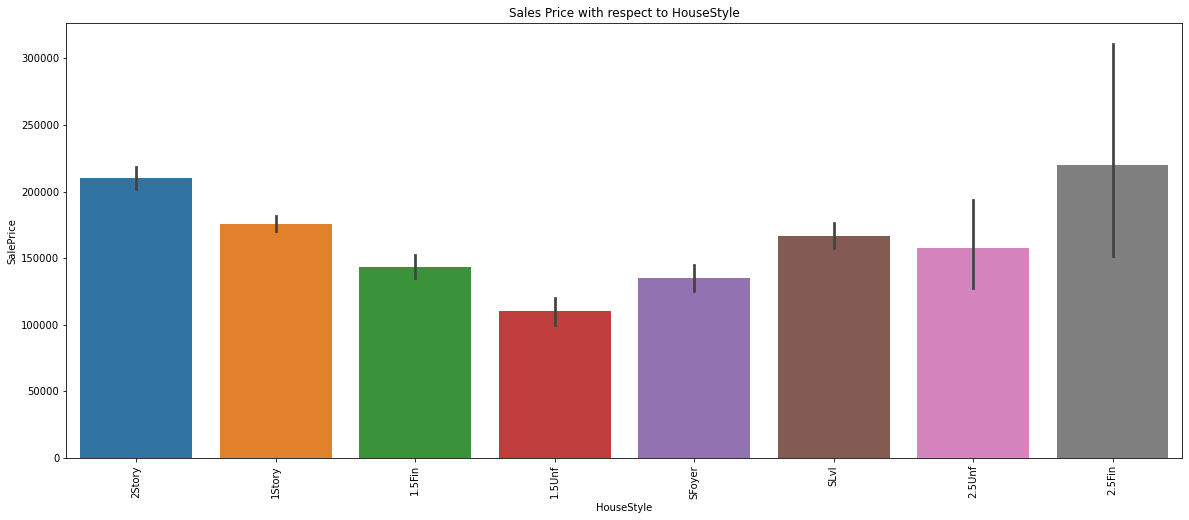

In [44]:
# plot 'HouseStyle' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="HouseStyle", y="SalePrice", data= houses_ds)
plt.title("Sales Price with respect to HouseStyle")
plt.xticks(rotation=90)
plt.show()

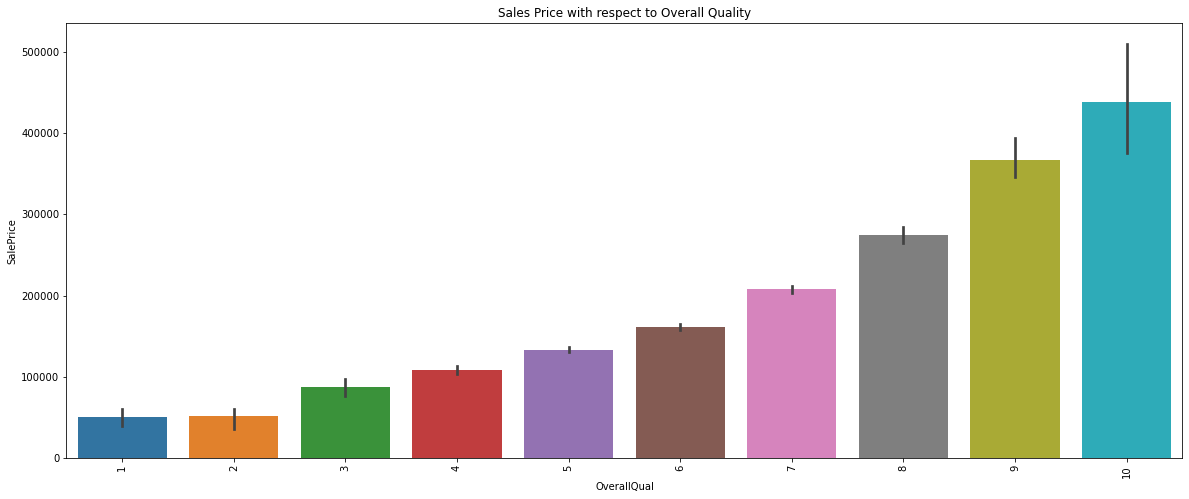

In [45]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= houses_ds)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)
plt.show()

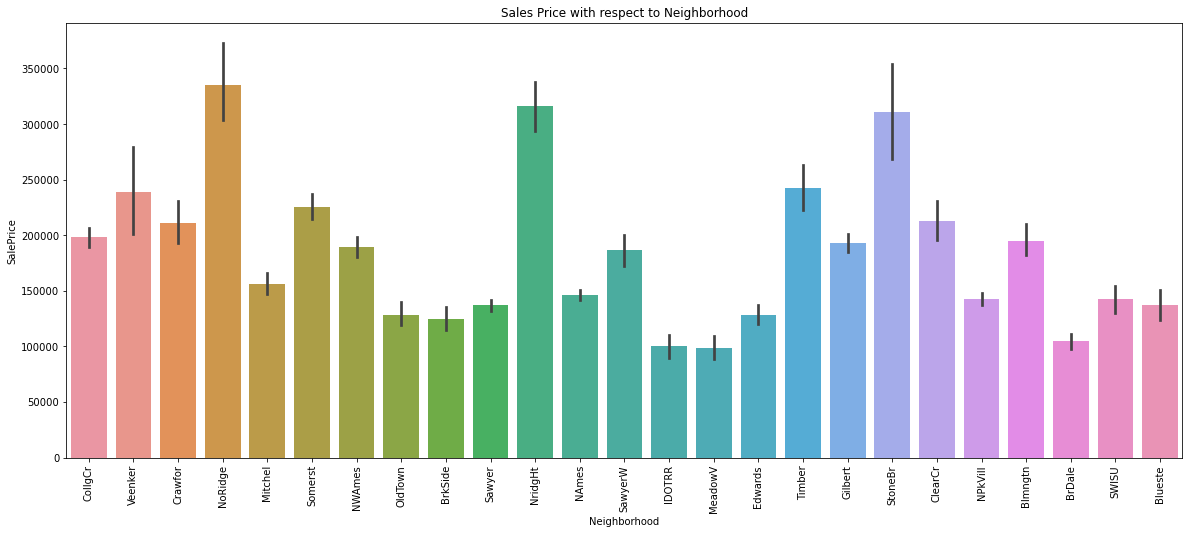

In [46]:
# plot 'Neighborhood' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= houses_ds)
plt.title("Sales Price with respect to Neighborhood")
plt.xticks(rotation=90)
plt.show()

### Observation :

- Increase in the overall quality has a direct positive effect on the sale price.
- Floating Village Residential (FV) and Residential Low Density (RL) Zones having high Sale Price.
- For most of the Neighborhood Sale price is high ( NoRidge,NridgHt,StoneBr having higher than others ),There are very number for which price is low
- We can see V shape pattern in the above graph for 'OverallQual', As we move from Left to Right Sale Price decreases and from one point (1.5Unf) it increases

### Checking for target Variable "SalePrice"

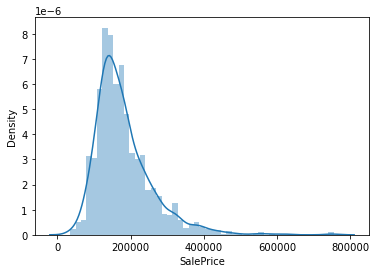

In [47]:
sns.distplot(houses_ds['SalePrice'])
plt.show()

In [48]:
data_raw = houses_ds.copy

#### Since the ```SalePrice``` figures are skewed towards left, we will apply the log transformation to obtain a centralized data


In [49]:
#Log Transformation
houses_ds['SalePrice'] = np.log1p(houses_ds['SalePrice'])

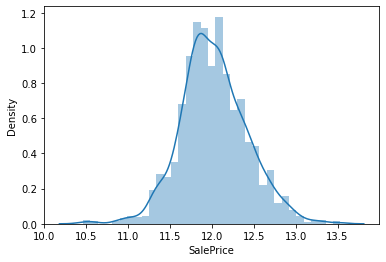

In [50]:
sns.distplot(houses_ds['SalePrice'])
plt.show()

### For Numerical Features we can have :
  - **Correlation matrix**, which tells how features are correlated to each other
  - Mostly with dependent variable
  
### Understanding pattern in numerical data with respect to predictor variable [SalePrice]

In [51]:
data_numeric = houses_ds.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0  12.247699  
1  12.109016  
2  12.317171  
3  11.849405  
4  12.429220

In [52]:
# correlation matrix
cor = data_numeric.corr()
cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009921 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.356718 -0.139781     0.032628   
LotFrontage   -0.009921   -0.356718     1.000000  0.304522     0.234812   
LotArea       -0.033226   -0.139781     0.304522  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234812  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.053281 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.116685  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.083348  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.178469  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.214367  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.042463  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.124098 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.363472  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.413773  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.072388  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.037469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.368007  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.090343  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.006979  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.180534  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.047222  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.236840  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.004905 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.320518  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.233221  0.271364     0.396765   
GarageYrBlt   -0.000122    0.081396     0.062996 -0.025865     0.514231   
GarageCars     0.016570   -0.040110     0.269539  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.323511  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.075542  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.137014  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010287 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.061945  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.037655  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180819  0.077672     0.065166   
MiscVal       -0.006242   -0.007683    -0.000255  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.010451  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.006380 -0.014261    -0.027347   
SalePrice     -0.017942   -0.073959     0.335292  0.257320     0.817185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.053281   0.116685      0.083348    0.178469    0.214367   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.113862   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.360067    0

### We have a better way to see the correlation between columns

### Heatmap : plotting Correlations on heatmap

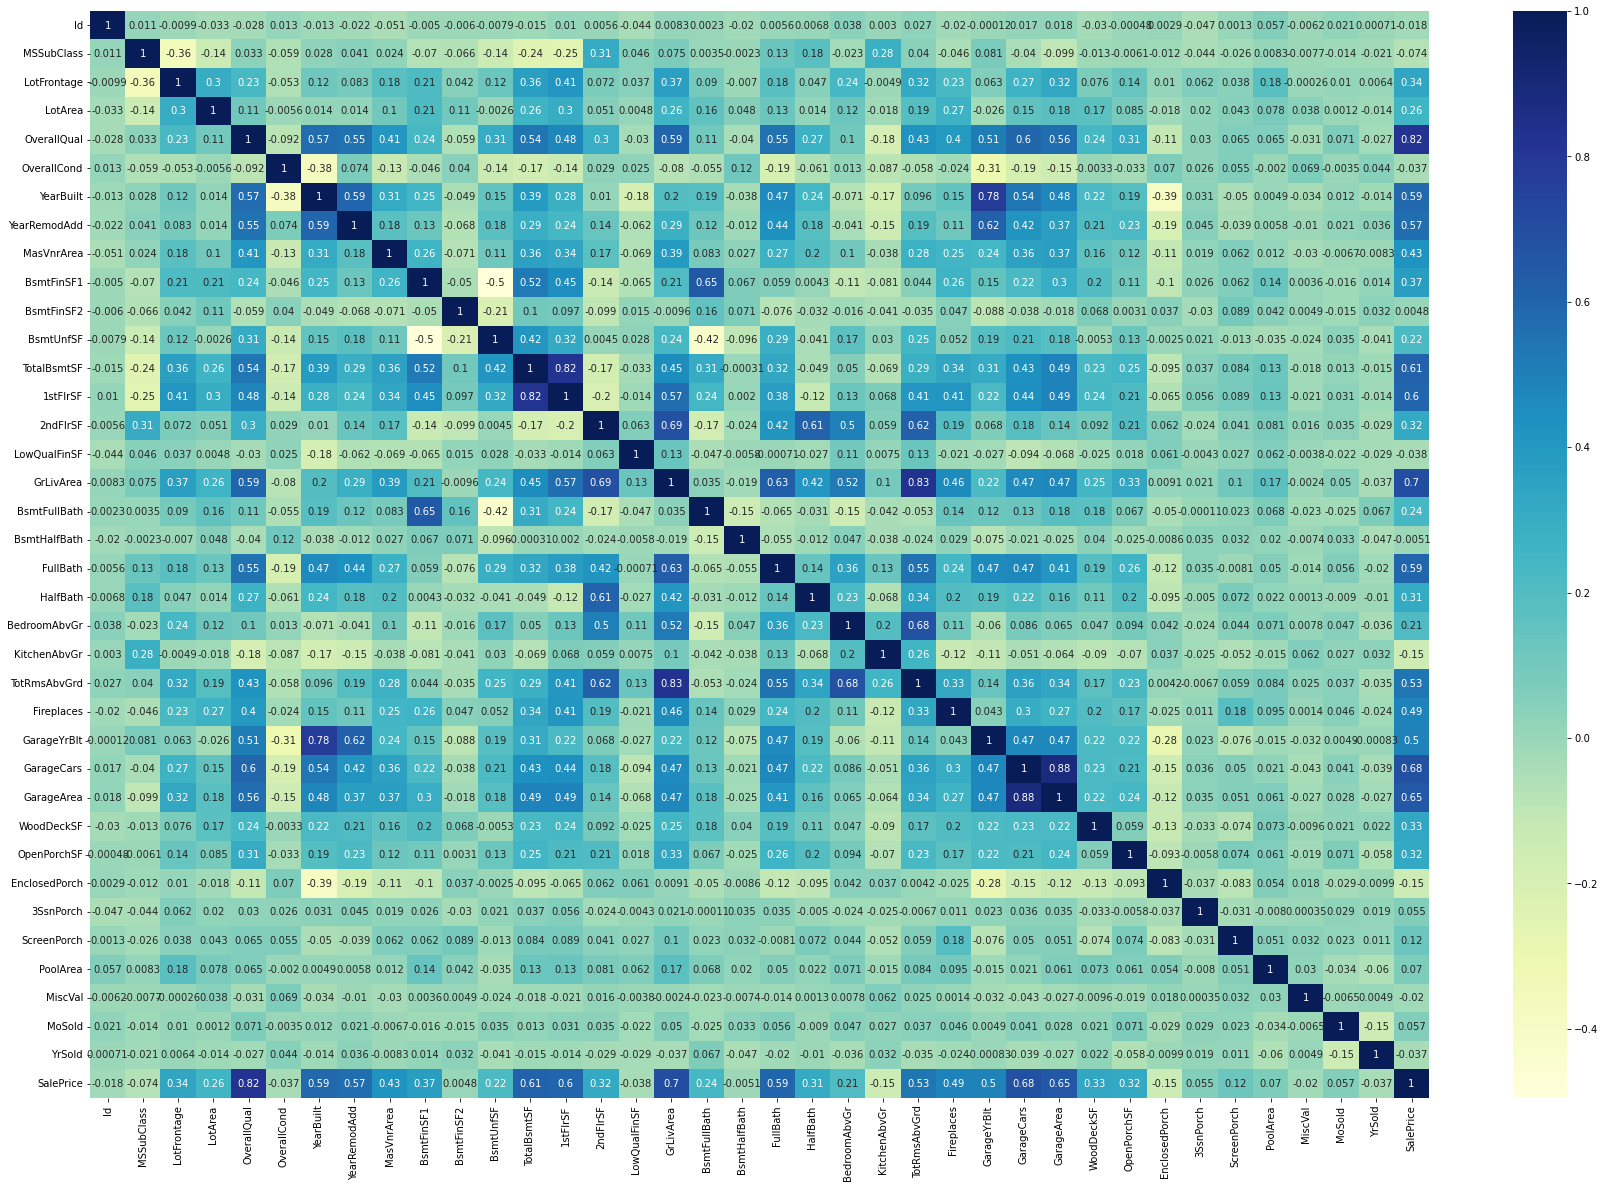

In [53]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### We can see that some of the variables are correlated
- Before dropping these columns, we will first check their predictive power

In [54]:
cor['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.495794
Fireplaces       0.489450
MasVnrArea       0.426776
BsmtFinSF1       0.372023
LotFrontage      0.335292
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

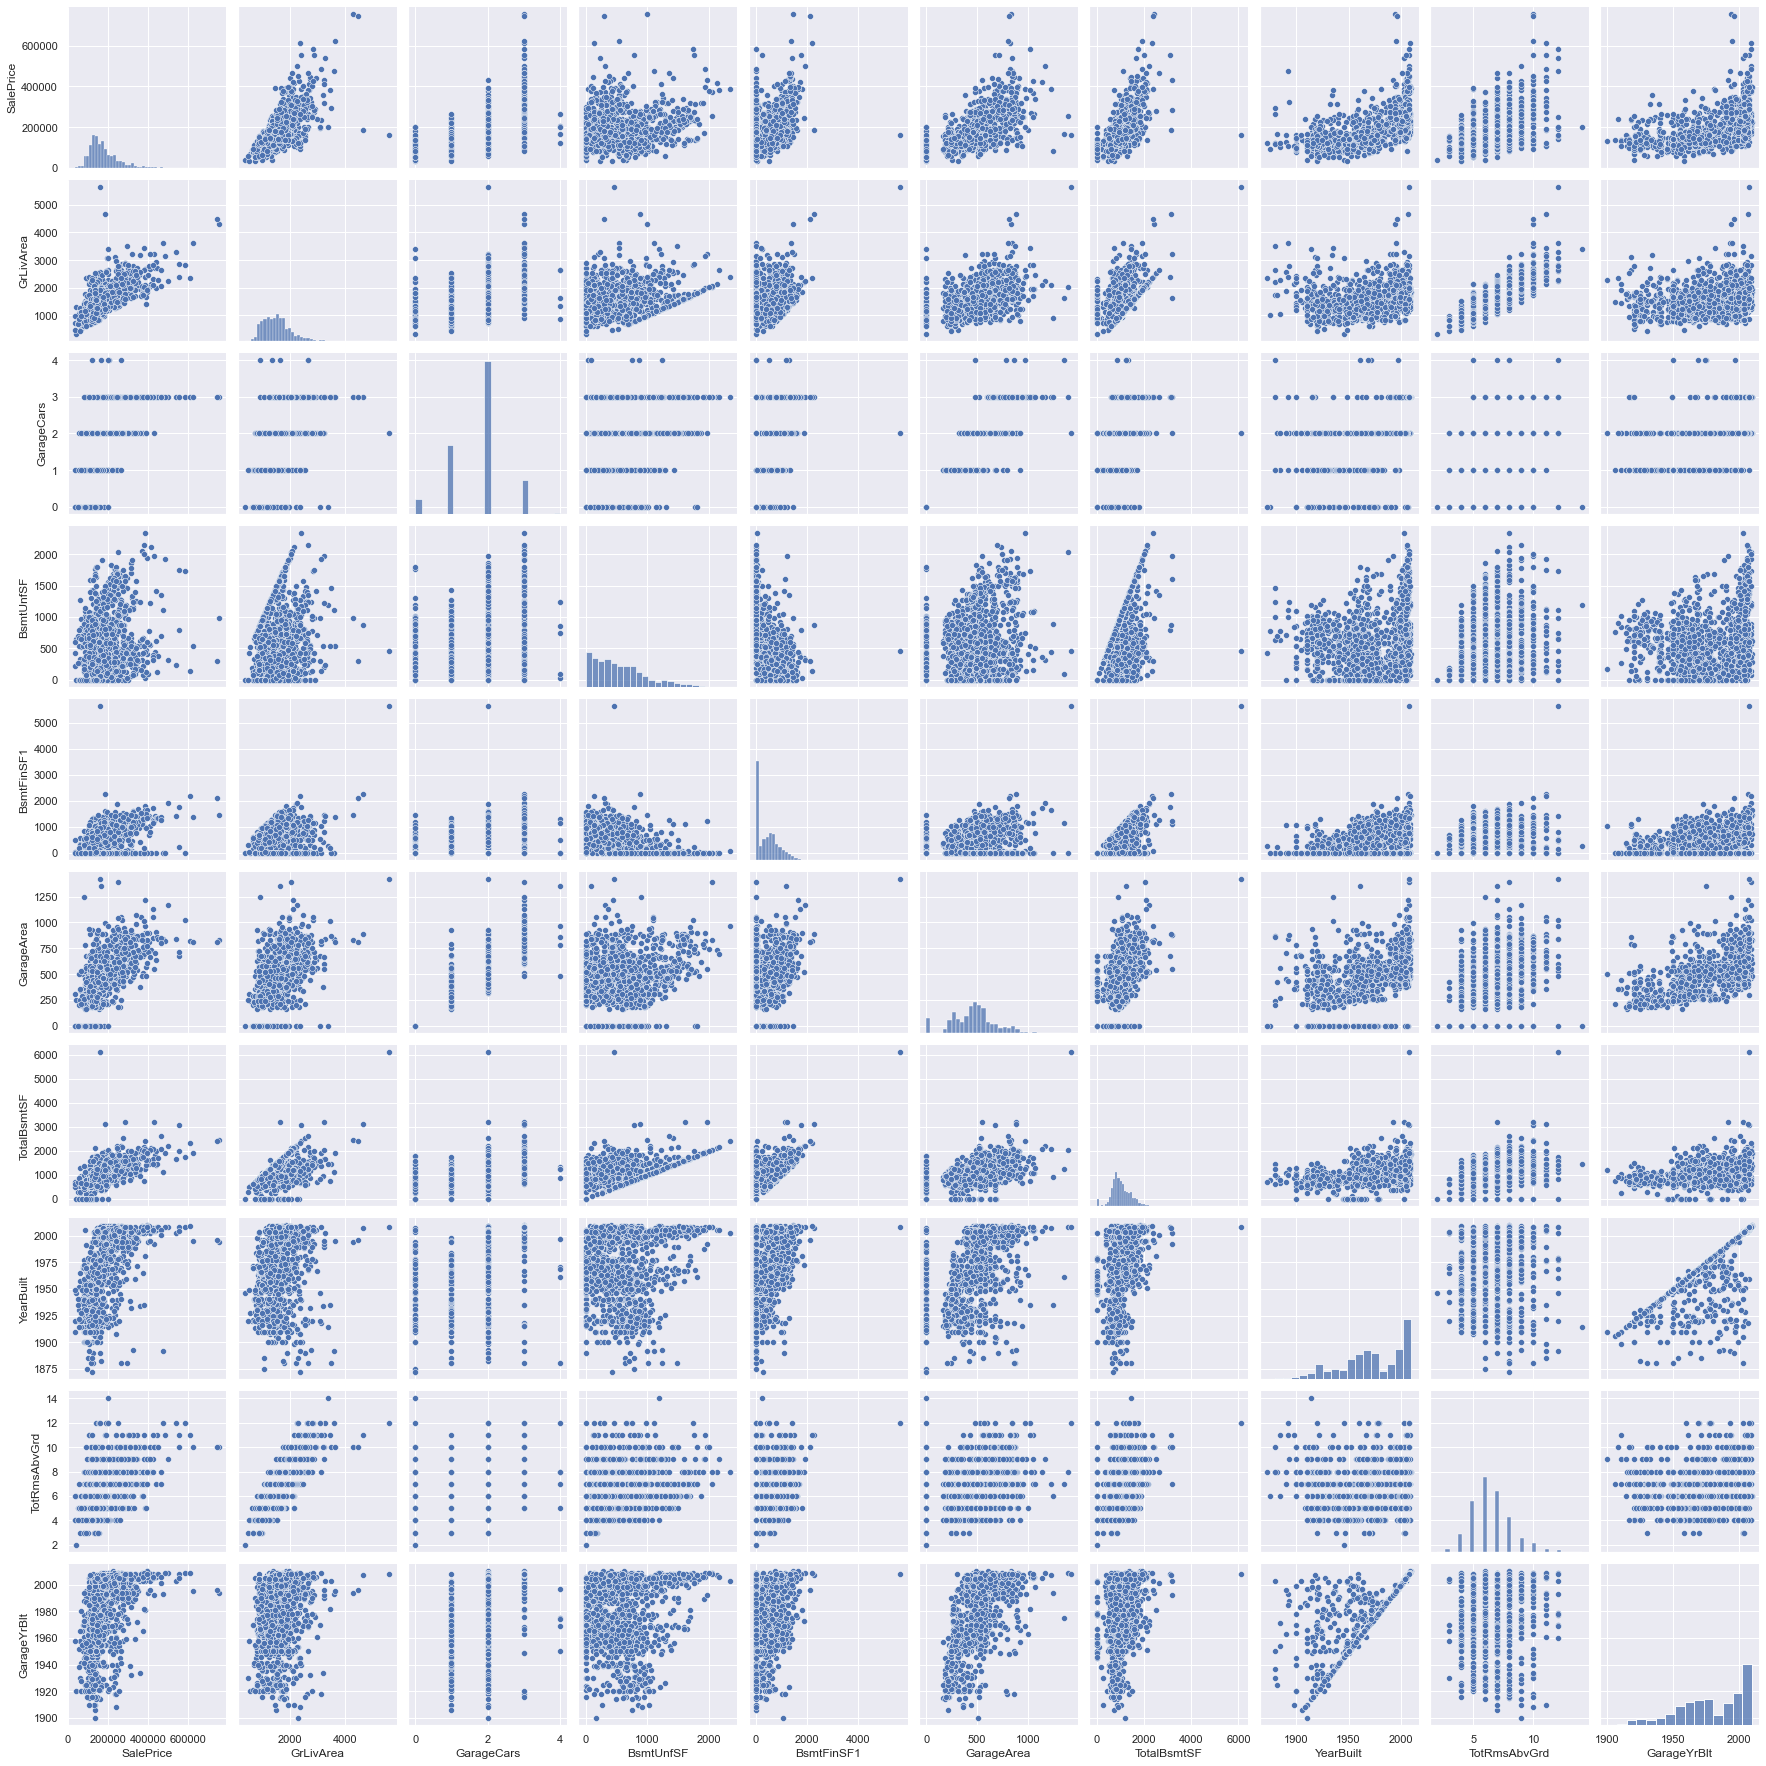

In [55]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

## Multicollinearity
There are some features which are correlated to other features as we can see through the heatmap so we need to remove those features:

 1. GarageArea <-> GarageCars
 2. TotRmsAbvGrd <-> GrLivArea
 3. GarageYrBlt <-> GarageArea and GarageCars
 
**BsmtUnfSF** is not contributing much to the target variable that is **SalePrice**

In [56]:
houses_ds = houses_ds.drop(['GarageCars'], axis = 1)
houses_ds = houses_ds.drop(['BsmtUnfSF'], axis = 1)
houses_ds = houses_ds.drop(['TotRmsAbvGrd'], axis = 1)
houses_ds = houses_ds.drop(['GarageYrBlt'], axis = 1)    

houses_ds.shape

(1460, 73)

In [57]:
#Numeric columns
houses_ds.select_dtypes(exclude=['object']).head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  \
0          2003       196.0         706           0          856       856   
1          1976         0.0         978           0         1262      1262   
2          2002       162.0         486           0          920       920   
3          1970         0.0         216           0          756       961   
4          2000       350.0         655           0         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0         1             3             1           0         548           0   
1         0             3             1           1         460         298   
2         1             3             1           1         608           0   
3         0             3             1           1         642           0   
4         1             4             1           1         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247699  
1       5    2007  12.109016  
2       9    2008  12.317171  
3       2    2006  11.849405  
4      12    2008  12.429220

### There are some features having outliers. So :
   - We need to be addresse those outliers
   - But as we don't have much data so we can't remove all
  
### Lets check some of the features

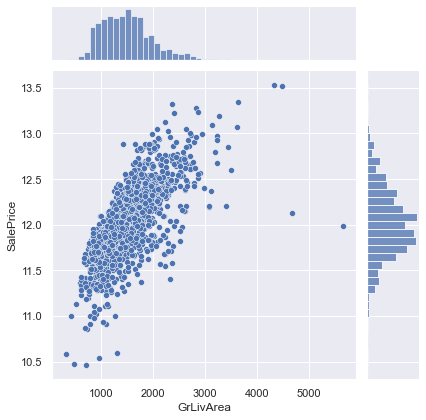

In [58]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=houses_ds)
plt.show()

### Create a method to remove the outliers values:


In [59]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [60]:
# Removing some outliers on lower right side of 'GrLivArea'
houses_ds = remove_outliers(houses_ds,'GrLivArea')

- Since the dataset is small it isn't advisable to do remove outliers.


In [61]:
houses_ds.shape

(1429, 73)

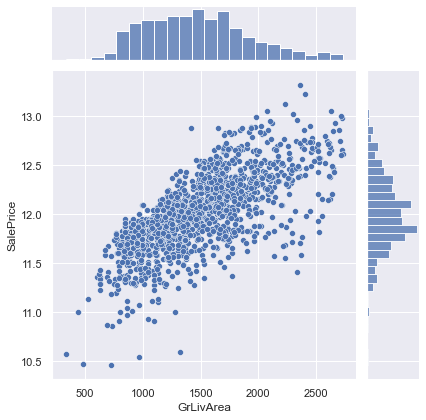

In [62]:
# Now plotting GeLivArea vs SalePrice
sns.jointplot(x = houses_ds['GrLivArea'], y = houses_ds['SalePrice'])
plt.show()

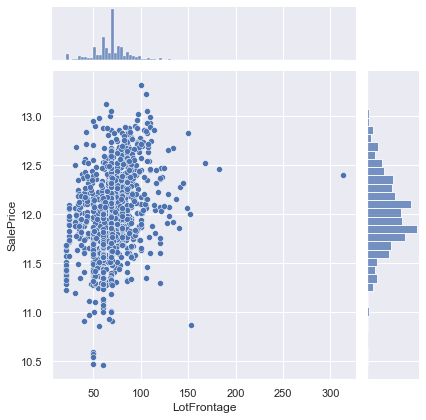

In [63]:
# `Lotfrontage` vs `SalePrice`
sns.jointplot(x = houses_ds['LotFrontage'], y = houses_ds['SalePrice'])
plt.show()

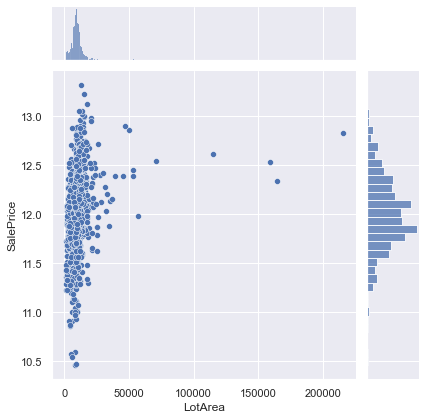

In [64]:
# `LotArea` vs `SalePrice`
sns.jointplot(x = houses_ds['LotArea'], y = houses_ds['SalePrice'])
plt.show()

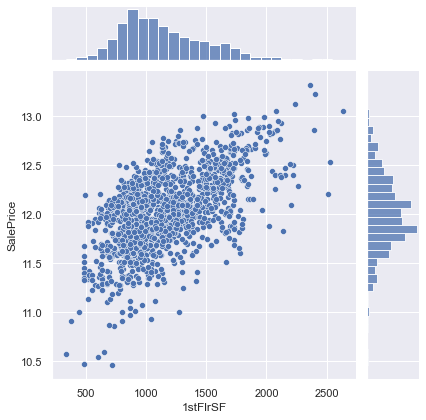

In [65]:
# `1stFlrSF` vs `SalePrice`
sns.jointplot(x = houses_ds['1stFlrSF'], y = houses_ds['SalePrice'])
plt.show()

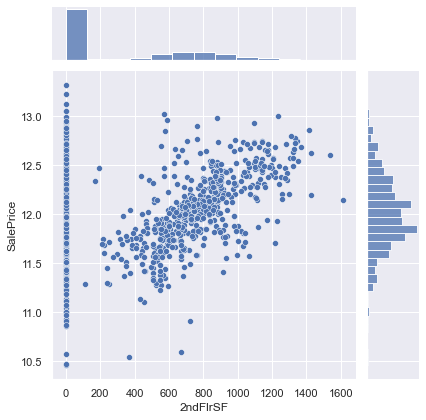

In [66]:
# `2ndFlrSF` vs `SalePrice`
sns.jointplot(x = houses_ds['2ndFlrSF'], y = houses_ds['SalePrice'])
plt.show()

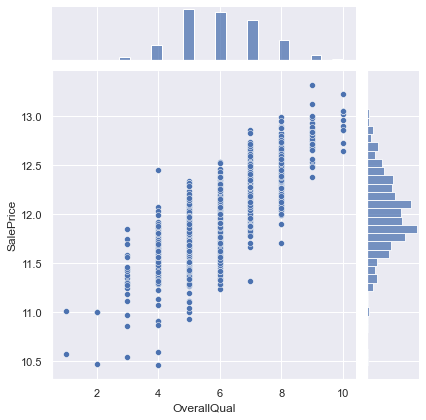

In [67]:
# `OverallQual` vs `SalePrice`
sns.jointplot(x = houses_ds['OverallQual'], y = houses_ds['SalePrice'])
plt.show()

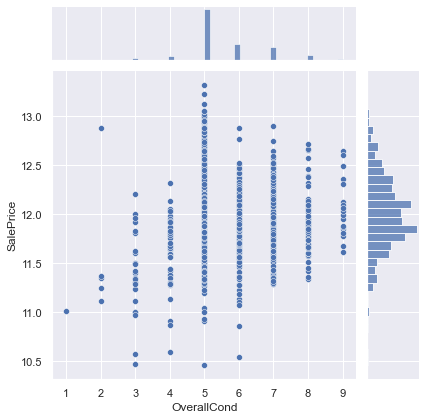

In [68]:
# `OverallCond` vs `SalePrice`
sns.jointplot(x= houses_ds['OverallCond'], y = houses_ds['SalePrice'])
plt.show()

- Ground or First level houses i.e. '0' second floor Sq.Ft has also a steady increase


## Datetime Variables
From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. From the housing data we can get **difference** in years between **the year the house was built** and **the year the house was sold**. We can derive a column for **'PropAge'** when it was sold.

### We can derive a new feature from these Datetime variables that is "Property Age"

In [69]:
# `PropAge` -  Property Age from `yearsold` - `yearbuilt`
houses_ds['PropAge'] = (houses_ds['YrSold'] - houses_ds['YearBuilt'])
houses_ds['PropAge'].head()

0     5
1    31
2     7
3    91
4     8
Name: PropAge, dtype: int64

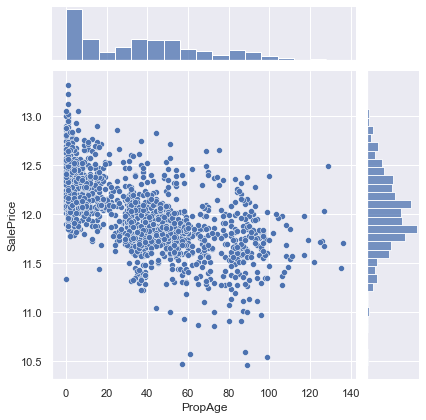

In [70]:
# `PropAge` vs `SalePrice`
sns.jointplot(x = houses_ds['PropAge'], y = houses_ds['SalePrice'])
plt.show()

### Observation :
- Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value

- So we can drop the columns: `MoSold`, `YrSold`, `YearBuilt` and `YearRemodAdd`      

In [71]:
houses_ds = houses_ds.drop(['MoSold'], axis = 1)
houses_ds = houses_ds.drop(['YrSold'], axis = 1)
houses_ds = houses_ds.drop(['YearBuilt'], axis = 1)
houses_ds = houses_ds.drop(['YearRemodAdd'], axis = 1)
houses_ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu  \
0             3             1          Gd        Typ           0         NaN   
1             3             1          TA        Typ           1          TA   
2             3             1          Gd        Typ           1          TA   
3             3             1          Gd        Typ           1          Gd   
4             4             1          Gd        Typ           1          TA   

  GarageType GarageFinish  GarageArea GarageQual GarageCond PavedDrive  \
0     Attchd          RFn         548         TA         TA          Y   
1     Attchd          RFn         460         TA         TA          Y   
2     Attchd          R

In [72]:
houses_ds.shape

(1429, 70)

### Drop the duplicate values
- Numeric feature's who's duplicate values are more than 95% :
  - ['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']

- Categorical feature's who's duplicate values are more than 95% :
  - ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating']


In [73]:
houses_ds.shape
houses_ds.drop(['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating'], axis = 1, inplace = True)
houses_ds.shape

(1429, 64)

In [74]:
houses_ds.shape
houses_ds.drop(['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal'], axis = 1, inplace = True)
houses_ds.shape

(1429, 58)

### As data cleaning done, now we can move into the next step: `Data Preparation`

# 3. Data Preprocessing
 - Creating Dummy columns to convert categorical into numerical
 - Pandas has inbuilt **get_dummies()** method for this

In [75]:
# Drop 'Id' from Dataframe

data = houses_ds.drop(['Id'], axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
0      CollgCr       Norm     1Fam     2Story            7            5   
1      Veenker      Feedr     1Fam     1Story            6            8   
2      CollgCr       Norm     1Fam     2Story            7            5   
3      Crawfor       Norm     1Fam     2Story            7            5   
4      NoRidge       Norm     1Fam     2Story            8            5   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF HeatingQC CentralAir  \
0         706          Unf           0          856        Ex          Y   
1         978          Unf           0         1262        Ex          Y   
2         486          Unf           0          920        Ex          Y   
3         216          Unf           0          756        Gd          Y   
4         655          Unf           0         1145        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0      SBrkr       856       854       1710             1         2         1   
1      SBrkr      1262         0       1262             0         2         0   
2      SBrkr       920       866       1786             1         2         1   
3      SBrkr       961       756       1717             1         1         0   
4      SBrkr      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             3          Gd        Typ           0         NaN     Attchd   
1             3          TA        Typ           1          TA     Attchd   
2             3          Gd        Typ           1          TA     Attchd   
3             3          Gd        Typ           1          Gd     Detchd   
4             4          Gd        Typ           1          TA     Attchd   

  GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0          RFn         548         TA         TA          Y           0   
1          RFn         460         TA         TA          Y         298   
2          RFn         608         TA         TA          Y           0   
3          Unf         642         TA         TA          Y           0   
4          RFn         836         TA         TA          Y         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch SaleType SaleCondition  SalePrice  \
0           61              0            0       WD        Normal  12.247699   
1            0              0            0       WD        Normal  12.109016   
2           42              0            0       WD        Normal  12.317171   
3           35            272            0   

In [76]:
data.shape

(1429, 57)

In [77]:
#type of each feature in data: int, float, object
types = data.dtypes

#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 

#categorical values are type object
categorical_type = types[types == object]


In [78]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()


object     33
int64      21
float64     3
Name: 0, dtype: int64

In [79]:
# we should convert numeric_type to a list to make it easier to work with

numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'PropAge']


### We have categorical features having each category with atleast 4 sub-cateagories, so we should decide the encoding method to encode these categorical features.

- We will use One-Hot Encoding method

In [80]:
data = pd.get_dummies(data, drop_first=True )
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706           0          856       856       854       1710   
1         978           0         1262      1262         0       1262   
2         486           0          920       920       866       1786   
3         216           0          756       961       756       1717   
4         655           0         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
0             1         2         1             3           0         548   
1             0         2         0             3           1         460   
2             1         2         1             3           1         608   
3             1         1         0             3           1         642   
4             1         2         1             4           1         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  PropAge  \
0           0           61              0            0  12.247699        5   
1         298            0              0            0  12.109016       31   
2           0           42              0            0  12.317171        7   
3           0           35            272            0  11.849405       91   
4         192           84              0            0  12.429220        8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 1                     0                    0   
1                 0                     0                    0   
2                 1                     0                    0   
3                 0                     0                    0   
4                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                

### Data Split for train and test

In [81]:
# Create x-axis variables

X = data.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706           0          856       856       854       1710   
1         978           0         1262      1262         0       1262   
2         486           0          920       920       866       1786   
3         216           0          756       961       756       1717   
4         655           0         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
0             1         2         1             3           0         548   
1             0         2         0             3           1         460   
2             1         2         1             3           1         608   
3             1         1         0             3           1         642   
4             1         2         1             4           1         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  PropAge  MSZoning_FV  \
0           0           61              0            0        5            0   
1         298            0              0            0       31            0   
2           0           42              0            0        7            0   
3           0           35            272            0       91            0   
4         192           84              0            0        8            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edward

In [82]:
X.shape

(1429, 200)

In [83]:
# Putting response variable to y

y = data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### Scaling for Predictor variables
  - As we have data at differenct scale which may affect the model
  - So better to bring all the features at one scale
  - Scaling is necessary before using Ridge or Lasso

In [84]:
numerical_columns.remove('SalePrice')
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PropAge']

In [85]:
cols_to_scale = numerical_columns
scaler = StandardScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    0.076225    -0.205480 -0.191357     0.701469    -0.517421    0.579914   
1   -0.863803     0.526766 -0.074428    -0.040499     2.204276   -0.576932   
2    0.076225    -0.059031  0.093339     0.701469    -0.517421    0.379237   
3    0.311232    -0.449562 -0.079512     0.701469    -0.517421   -0.576932   
4    0.076225     0.722032  0.399387     1.443437    -0.517421    1.488864   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0    0.634065   -0.287357    -0.458393 -0.808832  1.270737   0.518594   
1    1.269046   -0.287357     0.542588  0.326546 -0.789258  -0.477469   
2    0.120477   -0.287357    -0.300603 -0.629856  1.299683   0.687569   
3   -0.509835   -0.287357    -0.704940 -0.515200  1.034344   0.534158   
4    0.515006   -0.287357     0.254128 -0.000644  1.750759   1.603592   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
0      1.114016  0.857558  1.245028      0.200506   -0.938716    0.383471   
1     -0.817937  0.857558 -0.749529      0.200506    0.633881   -0.037041   
2      1.114016  0.857558  1.245028      0.200506    0.633881    0.670185   
3      1.114016 -1.021967 -0.749529      0.200506    0.633881    0.832655   
4      1.114016  0.857558  1.245028      1.462724    0.633881    1.759695   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch   PropAge  MSZoning_FV  \
0   -0.746583     0.255254      -0.363313    -0.271111 -1.050301            0   
1    1.664726    -0.720677      -0.363313    -0.271111 -0.183453            0   
2   -0.746583    -0.048724      -0.363313    -0.271111 -0.983620            0   
3   -0.746583    -0.160717       4.222053    -0.271111  1.816964            0   
4    0.807012     0.623229      -0.363313    -0.271111 -0.950280            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighbo

### After scaling we split our data into train and test dataset with 70-30 ratio

In [86]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [87]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
127    -0.276285    -0.693644 -0.604369    -0.782468     1.297044   -0.576932   
687     2.426296    -0.010214 -0.531466     0.701469    -0.517421   -0.576932   
1315    0.076225     0.770848  0.075546    -0.040499    -0.517421   -0.576932   
149    -0.158782    -0.010214 -0.416063    -0.782468    -1.424653   -0.576932   
1195    0.076225    -0.888909 -0.234163    -0.040499    -0.517421   -0.576932   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
127    -0.743284   -0.287357    -0.912039 -0.853576 -0.789258  -1.415725   
687    -0.456142   -0.287357    -1.210361 -1.661764  0.539849  -0.833206   
1315    0.153160    1.418464    -0.221708 -0.148858  1.671157   1.412383   
149    -1.014085   -0.287357    -0.359774 -0.696972  0.291395  -0.295154   
1195   -1.014085   -0.287357    -0.773973 -1.166784  0.966803  -0.046138   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
127      -0.817937 -1.021967 -0.749529      0.200506    0.633881   -2.235176   
687      -0.817937  0.857558  1.245028     -1.061712   -0.938716    0.058530   
1315     -0.817937  0.857558  1.245028      1.462724    2.206478    0.517271   
149      -0.817937 -1.021967 -0.749529      0.200506   -0.938716   -1.088323   
1195     -0.817937  0.857558  1.245028      0.200506   -0.938716   -0.323755   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch   PropAge  \
127    -0.746583    -0.720677      -0.363313    -0.271111  1.350200   
687    -0.746583     0.239255      -0.363313    -0.271111 -1.116981   
1315    1.519077    -0.720677      -0.363313    -0.271111  0.083269   
149     0.871745     1.103195      -0.363313    -0.271111  1.116818   
1195    0.062581    -0.336704      -0.363313    -0.271111 -1.116981   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
127             0            0            0            1             0   
687             1            0            0            0             1   
1315            0            0            1            0             0   
149             0            0            0            1             0   
1195            0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
127              0             0                0                0   
687              0             0                0                0   
1315             0             1                0                0   
149              0             1                0                0   
1195             0             0                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
127                 0                  0              0              0   
687                 1                  0              1              0   
1315                1                  0              0              0   
149                 1                  0              0              0   
1195                1                  0              0              0   

      LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
127                  1                     0                    0   
687                  0                     0                    0   
1315                 1                     0                    0   
149                  1                     0                    0   
1195                 1                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
127                      0                     0                     0   
687                      0                     0                     0   
1315                     0                     0                     0   
149                      1                     0                     0   
1195                     0                     0          

In [88]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
57      0.076225     0.966113  0.133501     0.701469    -0.517421   -0.576932   
1143   -0.863803    -0.010214 -0.135434    -0.782468    -2.331885   -0.576932   
377     0.076225     1.600726  0.082460     1.443437    -0.517421   -0.576932   
909     0.076225     3.895096  0.229485    -0.040499    -0.517421   -0.576932   
866    -0.863803    -0.107847  0.032943     1.443437    -0.517421    1.040291   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
57     -1.014085   -0.287357    -0.448531 -0.797646  1.285210   0.540828   
1143   -0.341752   -0.287357    -0.088572 -0.389357 -0.789258  -1.046648   
377    -1.014085   -0.287357     1.326607  1.215833  1.347926   2.199451   
909    -1.014085   -0.287357    -0.739456 -1.127633  1.000574   0.016116   
866    -1.014085   -0.287357     1.469604  1.400402 -0.789258   0.376299   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  \
57       -0.817937  0.857558  1.245028      0.200506   -0.938716    0.464707   
1143     -0.817937 -1.021967 -0.749529      0.200506   -0.938716   -2.235176   
377      -0.817937  2.737082 -0.749529      1.462724    0.633881    0.679742   
909      -0.817937  0.857558  1.245028      0.200506    0.633881   -0.371540   
866      -0.817937  0.857558 -0.749529      0.200506    0.633881    1.922166   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch   PropAge  \
57     -0.746583     0.399244      -0.363313    -0.271111 -1.150322   
1143   -0.746583    -0.336704      -0.363313    -0.271111  0.416672   
377     0.539988     2.703083      -0.363313    -0.271111 -1.116981   
909    -0.455284    -0.336704      -0.363313    -0.271111 -1.083641   
866     0.807012     0.559233      -0.363313    -0.271111 -1.183662   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
57              0            0            1            0             0   
1143            0            0            1            0             0   
377             1            0            0            0             0   
909             0            0            1            0             1   
866             0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
57               0             0                0                0   
1143             0             1                0                0   
377              0             0                0                0   
909              0             0                0                0   
866              0             0                1                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
57                  1                  0              0              0   
1143                1                  0              0              0   
377                 1                  0              0              0   
909                 1                  0              0              0   
866                 0                  0              0              0   

      LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
57                   0                     0                    0   
1143                 1                     0                    0   
377                  0                     0                    0   
909                  1                     0                    0   
866                  1                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
57                       0                     0                     1   
1143                     0                     0                     0   
377                      0                     0                     0   
909                      0                     0                     0   
866                      0                     0          

In [89]:
X_test.shape

(429, 200)

# 4. Model building & Model evaluation

### First try to build model using Linear Regression and RFE
  - For RFE we take 20 features


In [90]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [91]:
# Running RFE 
# Since there are more than 236 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)

 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select= 20)            
rfe = rfe.fit(X_train, y_train)


In [92]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 99),
 ('LotFrontage', False, 129),
 ('LotArea', False, 69),
 ('OverallQual', True, 1),
 ('OverallCond', False, 39),
 ('MasVnrArea', False, 179),
 ('BsmtFinSF1', False, 52),
 ('BsmtFinSF2', False, 130),
 ('TotalBsmtSF', False, 26),
 ('1stFlrSF', False, 162),
 ('2ndFlrSF', False, 139),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 76),
 ('FullBath', False, 114),
 ('HalfBath', False, 108),
 ('BedroomAbvGr', False, 178),
 ('Fireplaces', False, 121),
 ('GarageArea', False, 55),
 ('WoodDeckSF', False, 110),
 ('OpenPorchSF', False, 154),
 ('EnclosedPorch', False, 132),
 ('ScreenPorch', False, 111),
 ('PropAge', False, 18),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 152),
 ('LotShape_IR3', False, 176),
 ('LotShape_Reg', False, 133),
 ('LandContour_HLS', False, 95),
 ('LandContour_Low', False, 169),
 ('LandContour_Lvl', False, 92),
 ('LotConfig_CulDSac', False, 103),
 ('LotConfig

In [93]:
# Select the top 20 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrDale', 'HouseStyle_2.5Fin',
       'Exterior1st_BrkComm', 'Exterior2nd_CBlock', 'Foundation_Wood',
       'BsmtExposure_Gd', 'CentralAir_Y', 'Electrical_Mix', 'KitchenQual_Fa',
       'Functional_Sev', 'GarageQual_Gd', 'GarageQual_TA', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [94]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=180)

In [95]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [96]:
X_train_rfe = pd.DataFrame(X_train[col])

In [97]:
X_train_rfe.head()

OverallQual  GrLivArea  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
127     -0.782468  -1.415725            0            0            0   
687      0.701469  -0.833206            1            0            0   
1315    -0.040499   1.412383            0            0            1   
149     -0.782468  -0.295154            0            0            0   
1195    -0.040499  -0.046138            0            0            1   

      MSZoning_RM  Neighborhood_BrDale  HouseStyle_2.5Fin  \
127             1                    0                  0   
687             0                    0                  0   
1315            0                    0                  0   
149             1                    0                  0   
1195            0                    0                  0   

      Exterior1st_BrkComm  Exterior2nd_CBlock  Foundation_Wood  \
127                     0                   0                0   
687                     0                   0                0   
1315                    0                   0                0   
149                     0                   0                0   
1195                    0                   0                0   

      BsmtExposure_Gd  CentralAir_Y  Electrical_Mix  KitchenQual_Fa  \
127                 0             1               0               0   
687                 0             1               0               0   
1315                0             1               0               0   
149                 0             1               0               0   
1195                0             1               0               0   

      Functional_Sev  GarageQual_Gd  GarageQual_TA  SaleType_New  \
127                0              0              0             0   
687                0              0              1             0   
1315               0              0              1             0   
149                0              0              0             0   
1195               0              0              1             0   

      SaleCondition_Partial  
127                       0  
687                       0  
1315                      0  
149                       0  
1195                      0

In [98]:
X_train_rfe.shape

(1000, 20)

In [99]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9408081087154557

In [100]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2.9830110053902724e+16

### Find out the R2_score for train and test dataset after fit the linear regression model

In [101]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

print("="*20+" RFE"+"="*20)
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score for train:\t", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test:\t", r2_test_lr)
metric.append(r2_test_lr)

print("*"*50)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS score for train:\t", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS score for test:\t", rss2_lr)
metric.append(rss2_lr)

print("*"*50)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE score for train:\t", mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE score for test:\t", mse_test_lr)
metric.append(mse_test_lr**0.5)
print("="*50)

==================== RFE====================
R2 score for train:	 0.9408081087154557
R2 score for test:	 -2.9830110053902724e+16
**************************************************
RSS score for train:	 8.645469572627203
RSS score for test:	 1.9306895918872323e+18
**************************************************
RMSE score for train:	 0.008645469572627202
RMSE score for test:	 4500441939131077.5


### Since Test R2 score is lower than Train R2 score, we will check for some alternate methods of Regression:
  - Ridge Regression
  - Lasso Regression
  
### Lasso and Ridge Regression

Let's now try predicting house prices and perform lasso and ridge regression.

### 1. Ridge Regression

In [102]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
# cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results.sort_values(by='rank_test_score', ascending=True)

ridge_cv_res = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_res = ridge_cv_res[ridge_cv_res['param_alpha']<=500]
ridge_cv_res[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by='rank_test_score')


param_alpha  mean_train_score  mean_test_score  rank_test_score
22        10.0         -0.069300        -0.081393                1
21         9.0         -0.068978        -0.081411                2
20         8.0         -0.068624        -0.081449                3
19         7.0         -0.068241        -0.081522                4
23          20         -0.071633        -0.081554                5
18         6.0         -0.067828        -0.081629                6
17         5.0         -0.067368        -0.081770                7
16         4.0         -0.066849        -0.081970                8
15         3.0         -0.066249        -0.082234                9
24          50         -0.075247        -0.082388               10
14         2.0         -0.065520        -0.082686               11
13         1.0         -0.064540        -0.083576               12
25         100         -0.078296        -0.083645               13
12         0.9         -0.064416        -0.083723               14
11         0.8         -0.064287        -0.083900               15
10         0.7         -0.064145        -0.084107               16
9          0.6         -0.063987        -0.084339               17
8          0.5         -0.063814        -0.084616               18
7          0.4         -0.063622        -0.084936               19
6          0.3         -0.063410        -0.085324               20
5          0.2         -0.063181        -0.085855               21
4          0.1         -0.062937        -0.086610               22
3         0.05         -0.062818        -0.087157               23
2         0.01         -0.062730        -0.087755               24
1        0.001         -0.062709        -0.087924               25
0       0.0001         -0.062708        -0.087941               26
26         500         -0.089073        -0.091538               27

### Plotting mean test and train scoes with param_alpha and get the best estimator for lambda.


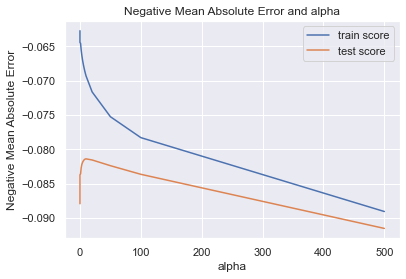

In [104]:
# plotting mean test and train scoes with alpha 
ridge_cv_res['param_alpha'] = ridge_cv_res['param_alpha'].astype('int32')

plt.plot(ridge_cv_res['param_alpha'], ridge_cv_res['mean_train_score'])
plt.plot(ridge_cv_res['param_alpha'], ridge_cv_res['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [105]:
# Printing the best hyperparameter alpha

ridge_cv_alpha = ridge_cv.best_params_['alpha']
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 10.0}
-0.08139334492761754


In [106]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised

alpha = ridge_cv_alpha
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.01413045  0.00995421  0.01772267  0.07285033  0.05245471  0.00160636
  0.02835392  0.01011558  0.04016405  0.03821842  0.03585461  0.07180132
  0.013342    0.01296027  0.01227487 -0.00123326  0.01094009  0.02823714
  0.01500476  0.00148914  0.00905601  0.01238207 -0.05698622  0.05285084
  0.01976241  0.05505264  0.00199287  0.00822365  0.00208817  0.00755736
  0.01168714 -0.02595859  0.00648669  0.03491841 -0.01209682 -0.00415794
 -0.01523308 -0.0078372  -0.02504459  0.03385123  0.02635738 -0.01184023
  0.10623325 -0.03265794 -0.00506742 -0.03507728 -0.07058578 -0.02554169
 -0.00257381  0.00852017 -0.01555888  0.00323083  0.02620092 -0.03098978
  0.00442149 -0.00450137 -0.00149471  0.01767256  0.06079789 -0.01331067
  0.00218864  0.01291961  0.04889123 -0.0149656   0.00873935 -0.00523821
  0.02457214  0.00430527  0.00712422  0.02505895 -0.020205   -0.03689074
  0.00257428  0.01492313 -0.01663923 -0.0224539   0.00391295  0.00176743
  0.00737204  0.02852808 -0.00977868  0.02083174 -0

In [107]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.738),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.01),
 ('LotArea', 0.018),
 ('OverallQual', 0.073),
 ('OverallCond', 0.052),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', 0.028),
 ('BsmtFinSF2', 0.01),
 ('TotalBsmtSF', 0.04),
 ('1stFlrSF', 0.038),
 ('2ndFlrSF', 0.036),
 ('GrLivArea', 0.072),
 ('BsmtFullBath', 0.013),
 ('FullBath', 0.013),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', -0.001),
 ('Fireplaces', 0.011),
 ('GarageArea', 0.028),
 ('WoodDeckSF', 0.015),
 ('OpenPorchSF', 0.001),
 ('EnclosedPorch', 0.009),
 ('ScreenPorch', 0.012),
 ('PropAge', -0.057),
 ('MSZoning_FV', 0.053),
 ('MSZoning_RH', 0.02),
 ('MSZoning_RL', 0.055),
 ('MSZoning_RM', 0.002),
 ('LotShape_IR2', 0.008),
 ('LotShape_IR3', 0.002),
 ('LotShape_Reg', 0.008),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', -0.026),
 ('LandContour_Lvl', 0.006),
 ('LotConfig_CulDSac', 0.035),
 ('LotConfig_FR2', -0.012),
 ('LotConfig_FR3', -0.004),
 ('LotConfig_Inside', -0.015),
 ('Neighborhood_Blueste', -0.008),
 ('Neighb

In [108]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
print("="*20+" Ridge"+"="*20)
print("Ridge alpha:", ridge_cv.best_params_['alpha'])
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score for tain:\t", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test:\t", r2_test_lr)
metric2.append(r2_test_lr)

print("*"*50)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS for tain:\t\t", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS for test:\t\t", rss2_lr)
metric2.append(rss2_lr)

print("*"*50)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE for tain:\t\t", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE for test:\t\t", mse_test_lr)
metric2.append(mse_test_lr**0.5)
print("="*50)

==================== Ridge====================
Ridge alpha: 10.0
R2 score for tain:	 0.9311564101720229
R2 score for test:	 0.9170883919322433
**************************************************
RSS for tain:		 10.05518067106625
RSS for test:		 5.366275164717607
**************************************************
RMSE for tain:		 0.01005518067106625
RMSE for test:		 0.012508799917756658


### Insight for Ridge Regression:
- It is visible that the model performaning good in Ridge Regression. 
- The train & the test scores are matching well.

In [109]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

### Sorting the coefficients in ascending order

In [110]:
para_rfe = pd.DataFrame(mod_ridge)
para_rfe.columns = ['Variable', 'Coeff']
res=para_rfe.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                constant  11.738
43   Neighborhood_Crawfor   0.106
199  SaleCondition_Normal   0.081
4             OverallQual   0.073
12              GrLivArea   0.072
193          SaleType_New   0.067
59   Neighborhood_StoneBr   0.061
153          CentralAir_Y   0.059
26            MSZoning_RL   0.055
126      Foundation_PConc   0.053
24            MSZoning_FV   0.053
5             OverallCond   0.052
166        Functional_Typ   0.051
63        Condition1_Norm   0.049
88    Exterior1st_BrkFace   0.046
136       BsmtExposure_Gd   0.043
9             TotalBsmtSF   0.040
96     Exterior1st_Stucco   0.039
10               1stFlrSF   0.038
197  SaleCondition_Alloca   0.038

### Lasso Regression

In [111]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=1]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 
                  'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1        0.001         -0.074765        -0.082398                1
0       0.0001         -0.064759        -0.082806                2
2         0.01         -0.090669        -0.092635                3
3         0.05         -0.116653        -0.117731                4
4          0.1         -0.151978        -0.152966                5
5          0.2         -0.226691        -0.227329                6
6          0.3         -0.288911        -0.289617                7
7          0.4         -0.295981        -0.296573                8
8          0.5         -0.295981        -0.296573                8
9          0.6         -0.295981        -0.296573                8
10         0.7         -0.295981        -0.296573                8
11         0.8         -0.295981        -0.296573                8
12         0.9         -0.295981        -0.296573                8
13         1.0         -0.295981        -0.296573                8

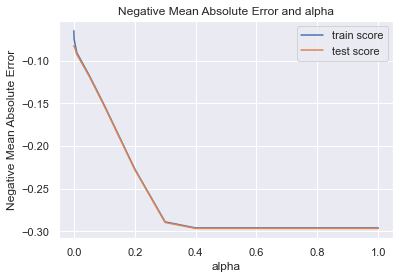

In [113]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stablizes thereafter

### But we will choose a low value of alpha to balance the trade-off between Bias-Variance


In [114]:
# Printing the best hyperparameter alpha
lasso_alpha = lasso_cv.best_params_['alpha']
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.0823982683700295


In [115]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha = lasso_alpha

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [116]:
lasso.coef_

array([-0.00905225,  0.00919739,  0.01660074,  0.08814657,  0.0559424 ,
        0.0014748 ,  0.03078746,  0.0036982 ,  0.04221614,  0.00012222,
        0.        ,  0.1213625 ,  0.01479091,  0.00798826,  0.00787778,
       -0.00422696,  0.01140836,  0.03232517,  0.01395175,  0.00085116,
        0.00799809,  0.01191337, -0.06729403,  0.06297563,  0.        ,
        0.06661715, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.00055026,  0.02522888, -0.        ,
        0.        , -0.01134699, -0.        , -0.        ,  0.03078298,
        0.        , -0.        ,  0.10979699, -0.00942229, -0.        ,
       -0.        , -0.02875223, -0.00969537,  0.        , -0.        ,
       -0.        , -0.        ,  0.00496194, -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.01731471, -0.        ,
        0.        ,  0.        ,  0.03268456, -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [117]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

print("="*20+" Lasso= "+"="*20)
print("Lasso alpha:",lasso_alpha)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score for train: \t", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test: \t", r2_test_lr)
metric3.append(r2_test_lr)

print("="*50)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS score for train: \t", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS score for test: \t", rss2_lr)
metric3.append(rss2_lr)

print("="*50)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE score for train: \t", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE score for Test: \t", mse_test_lr)
metric3.append(mse_test_lr**0.5)
print("="*50)

==================== Lasso= ====================
Lasso alpha: 0.001
R2 score for train: 	 0.9210969639983456
R2 score for test: 	 0.9169313339947324
RSS score for train: 	 11.524446712827544
RSS score for test: 	 5.376440401276502
RMSE score for train: 	 0.011524446712827544
RMSE score for Test: 	 0.012532495107870635


In [118]:
# lasso model parameters

lasso_params = list(lasso.coef_ )
lasso_params.insert(0, lasso.intercept_)
lasso_params = [round(x, 3) for x in lasso_params]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, lasso_params))

[('constant', 11.739),
 ('MSSubClass', -0.009),
 ('LotFrontage', 0.009),
 ('LotArea', 0.017),
 ('OverallQual', 0.088),
 ('OverallCond', 0.056),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.031),
 ('BsmtFinSF2', 0.004),
 ('TotalBsmtSF', 0.042),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 0.121),
 ('BsmtFullBath', 0.015),
 ('FullBath', 0.008),
 ('HalfBath', 0.008),
 ('BedroomAbvGr', -0.004),
 ('Fireplaces', 0.011),
 ('GarageArea', 0.032),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.001),
 ('EnclosedPorch', 0.008),
 ('ScreenPorch', 0.012),
 ('PropAge', -0.067),
 ('MSZoning_FV', 0.063),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.067),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.001),
 ('LotConfig_CulDSac', 0.025),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', 0.0),
 ('LotConfig_Inside', -0.011),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDale', -0.0

In [119]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, lasso_params))

In [120]:
lasso_df = pd.DataFrame(mod)
lasso_df.columns = ['Variable', 'Coeff']

In [121]:
# sort the coefficients in ascending order
lasso_df = lasso_df.sort_values((['Coeff']), axis = 0, ascending = False)
lasso_df = pd.DataFrame(lasso_df[(lasso_df['Coeff'] != 0)])
lasso_df

Variable   Coeff
0                constant  11.739
12              GrLivArea   0.121
43   Neighborhood_Crawfor   0.110
193          SaleType_New   0.109
4             OverallQual   0.088
199  SaleCondition_Normal   0.078
26            MSZoning_RL   0.067
24            MSZoning_FV   0.063
5             OverallCond   0.056
153          CentralAir_Y   0.054
126      Foundation_PConc   0.050
9             TotalBsmtSF   0.042
166        Functional_Typ   0.042
136       BsmtExposure_Gd   0.036
63        Condition1_Norm   0.033
18             GarageArea   0.032
40   Neighborhood_BrkSide   0.031
7              BsmtFinSF1   0.031
88    Exterior1st_BrkFace   0.029
34      LotConfig_CulDSac   0.025
117      MasVnrType_Stone   0.025
185         GarageCond_TA   0.022
168        FireplaceQu_Gd   0.020
59   Neighborhood_StoneBr   0.017
3                 LotArea   0.017
93    Exterior1st_MetalSd   0.015
13           BsmtFullBath   0.015
80        HouseStyle_SLvl   0.015
19             WoodDeckSF   0.014
22            ScreenPorch   0.012
124          ExterCond_TA   0.011
17             Fireplaces   0.011
2             LotFrontage   0.009
15               HalfBath   0.008
14               FullBath   0.008
21          EnclosedPorch   0.008
53   Neighborhood_NridgHt   0.005
171     GarageType_Attchd   0.005
140      BsmtFinType1_GLQ   0.004
8              BsmtFinSF2   0.004
148      BsmtFinType2_Unf   0.003
20            OpenPorchSF   0.001
6              MasVnrArea   0.001
33        LandContour_Lvl   0.001
81        RoofStyle_Gable  -0.002
144      BsmtFinType2_BLQ  -0.002
138       BsmtExposure_No  -0.002
118          ExterQual_Fa  -0.003
16           BedroomAbvGr  -0.004
120          ExterQual_TA  -0.004
158        KitchenQual_Fa  -0.006
160        KitchenQual_TA  -0.006
1              MSSubClass  -0.009
44   Neighborhood_Edwards  -0.009
48   Neighborhood_Mitchel  -0.010
98    Exterior1st_Wd Sdng  -0.010
131           BsmtQual_Gd  -0.010
72         BldgType_Twnhs  -0.011
37       LotConfig_Inside  -0.011
152          HeatingQC_TA  -0.013
195           SaleType_WD  -0.020
132           BsmtQual_TA  -0.022
47   Neighborhood_MeadowV  -0.029
23                PropAge  -0.067

In [122]:
lasso_df.shape

(64, 2)

### Selected features after shrinking insignificant features by Lasso

In [123]:
lasso_sel_features = list(lasso_df['Variable'])
lasso_sel_features

['constant',
 'GrLivArea',
 'Neighborhood_Crawfor',
 'SaleType_New',
 'OverallQual',
 'SaleCondition_Normal',
 'MSZoning_RL',
 'MSZoning_FV',
 'OverallCond',
 'CentralAir_Y',
 'Foundation_PConc',
 'TotalBsmtSF',
 'Functional_Typ',
 'BsmtExposure_Gd',
 'Condition1_Norm',
 'GarageArea',
 'Neighborhood_BrkSide',
 'BsmtFinSF1',
 'Exterior1st_BrkFace',
 'LotConfig_CulDSac',
 'MasVnrType_Stone',
 'GarageCond_TA',
 'FireplaceQu_Gd',
 'Neighborhood_StoneBr',
 'LotArea',
 'Exterior1st_MetalSd',
 'BsmtFullBath',
 'HouseStyle_SLvl',
 'WoodDeckSF',
 'ScreenPorch',
 'ExterCond_TA',
 'Fireplaces',
 'LotFrontage',
 'HalfBath',
 'FullBath',
 'EnclosedPorch',
 'Neighborhood_NridgHt',
 'GarageType_Attchd',
 'BsmtFinType1_GLQ',
 'BsmtFinSF2',
 'BsmtFinType2_Unf',
 'OpenPorchSF',
 'MasVnrArea',
 'LandContour_Lvl',
 'RoofStyle_Gable',
 'BsmtFinType2_BLQ',
 'BsmtExposure_No',
 'ExterQual_Fa',
 'BedroomAbvGr',
 'ExterQual_TA',
 'KitchenQual_Fa',
 'KitchenQual_TA',
 'MSSubClass',
 'Neighborhood_Edwards',
 'Ne

### Creating a table which contain all the metrics for Comparison

In [124]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.408081e-01          0.931156          0.921097
1   R2 Score (Test)      -2.983011e+16          0.917088          0.916931
2       RSS (Train)       8.645470e+00         10.055181         11.524447
3        RSS (Test)       1.930690e+18          5.366275          5.376440
4       MSE (Train)       9.298102e-02          0.100276          0.107352
5        MSE (Test)       6.708533e+07          0.111843          0.111949

# Observation  :
------------------------------

  - **R2_score and Mean Squared Error for Ridge and Lasso** :
  
      - **Ridge Regression** 
          - R2 score [Train Data] :  0.931156
          - R2 score [Test Data]  :  0.917088
          - Mean Squared Error [Test Data]: 0.111843
          
      - **Lasso Regression**
          - R2 score [Train Data] :  0.921097
          - R2 score [Test Data]  :  0.916931
          - Mean Squared Error [Test Data]: 0.111949   
          
          
- **Though model performance by Ridge Regression is better than Lasso in terms of R2 Score and MSE, but better to use Lasso Regression as it also helps us in Feature Selection by shrinking most of the insignificant features to 0.**
 
 
- **As it is always advisable to use simple yet robust model.**
   
   - **Optimal value of Alpha/Lambda for Ridge and Lasso** :   
      - Ridge (**Alpha = 10.0**)
      - Lasso (**Alpha = 0.001**)
      
   - **Equation formed by features and coefficients obtained by Lasso** 

In [125]:
## Assigns features to x1,x2,x3,x4,........,x64
lasso_df.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 
                                       'x12', 'x13', 'x14', 'x15', 'x16','x17','x18','x19','x20','x21','x22','x23',
                                       'x24','x25', 'x26', 'x27', 'x28','x29','x30','x31','x32','x33','x34','x35',
                                       'x36','x37', 'x38', 'x39', 'x40','x41','x42','x43','x44','x45','x46','x47',
                                       'x48','x49', 'x50', 'x51', 'x52','x53','x54','x55','x56','x57','x58','x59',
                                       'x60','x61', 'x62', 'x63']), inplace = True) 
lasso_df

Variable   Coeff
C                constant  11.739
x1              GrLivArea   0.121
x2   Neighborhood_Crawfor   0.110
x3           SaleType_New   0.109
x4            OverallQual   0.088
x5   SaleCondition_Normal   0.078
x6            MSZoning_RL   0.067
x7            MSZoning_FV   0.063
x8            OverallCond   0.056
x9           CentralAir_Y   0.054
x10      Foundation_PConc   0.050
x11           TotalBsmtSF   0.042
x12        Functional_Typ   0.042
x13       BsmtExposure_Gd   0.036
x14       Condition1_Norm   0.033
x15            GarageArea   0.032
x16  Neighborhood_BrkSide   0.031
x17            BsmtFinSF1   0.031
x18   Exterior1st_BrkFace   0.029
x19     LotConfig_CulDSac   0.025
x20      MasVnrType_Stone   0.025
x21         GarageCond_TA   0.022
x22        FireplaceQu_Gd   0.020
x23  Neighborhood_StoneBr   0.017
x24               LotArea   0.017
x25   Exterior1st_MetalSd   0.015
x26          BsmtFullBath   0.015
x27       HouseStyle_SLvl   0.015
x28            WoodDeckSF   0.014
x29           ScreenPorch   0.012
x30          ExterCond_TA   0.011
x31            Fireplaces   0.011
x32           LotFrontage   0.009
x33              HalfBath   0.008
x34              FullBath   0.008
x35         EnclosedPorch   0.008
x36  Neighborhood_NridgHt   0.005
x37     GarageType_Attchd   0.005
x38      BsmtFinType1_GLQ   0.004
x39            BsmtFinSF2   0.004
x40      BsmtFinType2_Unf   0.003
x41           OpenPorchSF   0.001
x42            MasVnrArea   0.001
x43       LandContour_Lvl   0.001
x44       RoofStyle_Gable  -0.002
x45      BsmtFinType2_BLQ  -0.002
x46       BsmtExposure_No  -0.002
x47          ExterQual_Fa  -0.003
x48          BedroomAbvGr  -0.004
x49          ExterQual_TA  -0.004
x50        KitchenQual_Fa  -0.006
x51        KitchenQual_TA  -0.006
x52            MSSubClass  -0.009
x53  Neighborhood_Edwards  -0.009
x54  Neighborhood_Mitchel  -0.010
x55   Exterior1st_Wd Sdng  -0.010
x56           BsmtQual_Gd  -0.010
x57        BldgType_Twnhs  -0.011
x58      LotConfig_Inside  -0.011
x59          HeatingQC_TA  -0.013
x60           SaleType_WD  -0.020
x61           BsmtQual_TA  -0.022
x62  Neighborhood_MeadowV  -0.029
x63               PropAge  -0.067

### Conclusion :
-------------------

- As a suggestion Surprise Housing company keep checking those predictors affecting the house sale price.

- Higher value of Positive Coefficient, helps for high Sale Price.

- Some of the features are below :

|**Feature**|**Description**|
|:---|---|
|GrLivArea|Above grade (ground) living area square feet|
|Neighborhood(Crawfor)|Physical locations within Ames city limits (Crawford)|
|SaleType(New)|Type of sale (Home just constructed and sold)|
|OverallQual|Rates the overall material and finish of the house|
|SaleCondition(Normal)|Condition of sale (Normal Sale)|

- Higher value of Negative Coefficient, suggests dip in Sale Price

- Some of the features are below :

|**Feature**|**Description**|
|:---|---|
|PropAge |Age of property at the time of Selling|
|Neighborhood (MeadowV)|Physical locations within Ames city limits (Meadow Village)|
|BsmtQual (TA))|Evaluates the height of the basement (Typical (80-89 inches)) |
|SaleType (WD) |Type of sale (Warranty Deed - Conventional)|
|HeatingQC (TA)|Heating quality and condition (Average/Typical) |



---
| Code snippet for Subjective+Questions|
| --- |

# Question 1:
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

# Ridge:

In [126]:
# Printing the best hyperparameter alpha for Ridge

ridge_cv_alpha = ridge_cv.best_params_['alpha']
print("Ridge best alpha value is:", ridge_cv.best_params_)

Ridge best alpha value is: {'alpha': 10.0}


In [127]:
# Fitting Ridge model for alpha = 20 and printing coefficients 
# which have been penalised

alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [128]:
# Lets calculate some metrics such as R2 score and RMSE

print("="*20+" Ridge"+"="*20)
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score for tain:\t", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test:\t", r2_test_lr)

print("*"*50)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE for tain:\t\t", mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE for test:\t\t", mse_test_lr)
print("="*50)

==================== Ridge====================
R2 score for tain:	 0.9274704870547599
R2 score for test:	 0.9176960285904247
**************************************************
RMSE for tain:		 0.01059354049478184
RMSE for test:		 0.01241712632033141


# Lasso 

In [129]:
# Printing the best hyperparameter alpha for Lasso

lasso_alpha = lasso_cv.best_params_['alpha']
print(lasso_cv.best_params_)

{'alpha': 0.001}


In [130]:
# Fitting Ridge model for alpha = 0.002 and printing coefficients
# which have been penalised

alpha = 0.002

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [131]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

print("="*20+" Lasso= "+"="*20)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score for train: \t", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test: \t", r2_test_lr)

print("="*50)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE score for train: \t", mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE score for test: \t", mse_test_lr)
print("="*50)

==================== Lasso= ====================
R2 score for train: 	 0.9118168386236352
R2 score for test: 	 0.9120823052879093
RMSE score for train: 	 0.012879886449860819
RMSE score for test: 	 0.013264063718137356


# Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [132]:
# Top 5 predictor given by previous model are:
top5 = ['GrLivArea','Neighborhood_Crawfor','SaleType_New','OverallQual','SaleCondition_Normal']

# Removing top 5 feature
X_train_new = X_train.drop(top5, axis= 1)
X_test_new = X_test.drop(top5, axis= 1)


In [133]:
# Creating lasso regression object
lasso = Lasso()

# lambda params
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# folds 
folds = 5

# cross validation
lasso_cv_new = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_new.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
# best parameter
lasso_cv_new.best_params_

{'alpha': 0.0001}

In [135]:
# Fitting Ridge model for alpha = 0.0001 and printing coefficients
# which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train_new, y_train) 

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

In [136]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

print("="*20+" Lasso= "+"="*20)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score for train: \t", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score for test: \t", r2_test_lr)

print("="*50)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE score for train: \t", mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE score for test: \t", mse_test_lr)
print("="*50)

==================== Lasso= ====================
R2 score for train: 	 0.9278049926395151
R2 score for test: 	 0.9154934157688805
RMSE score for train: 	 0.01054468316327721
RMSE score for test: 	 0.012749432540450368


In [137]:
# Sort the coefficients in ascending order with top 5 feature

coeff_top5 = pd.DataFrame(index= X_train_new.columns)
coeff_top5 ['lasso_top5'] = lasso.coef_
coeff_top5.sort_values(ascending=False, by=['lasso_top5']).head()

lasso_top5
MSZoning_FV             0.340913
MSZoning_RL             0.316646
MSZoning_RM             0.283028
MSZoning_RH             0.277828
Neighborhood_StoneBr    0.113168

# Thank you.